In [89]:
import pandas as pd

# 1. Cargar ambos archivos Excel
df_main = pd.read_excel("Vasculitis-TFG final sin nhc revisado2.xlsx", header=2)
df_aux = pd.read_excel("VASCULITIS_BXRENAL..xlsx", header=2)


print("Columnas en df_main:")
print(df_main.columns.tolist())

print("\nColumnas en df_aux:")
print(df_aux.columns.tolist())

# 2. Normalizar el nombre de la columna clave

df_main.rename(columns=lambda x: x.strip() if isinstance(x, str) else x, inplace=True)
df_aux.rename(columns=lambda x: x.strip() if isinstance(x, str) else x, inplace=True)
# Asegúrate de que las columnas tengan el mismo nombre y formato
df_main['Fecha nacimiento'] = pd.to_datetime(df_main['Fecha nacimiento'], errors='coerce')
df_aux['Fecha nacimiento'] = pd.to_datetime(df_aux['Fecha nacimiento'], errors='coerce')

# 3. Establecer la columna clave para el merge
clave = 'Fecha nacimiento'

# 4. Hacer el merge (left join) manteniendo los datos principales
df_merged = pd.merge(df_main, df_aux, on=clave, how='left', suffixes=('', '_aux'))

# 5. Completar valores nulos del principal con valores del auxiliar
for col in df_aux.columns:
    if col != clave and col in df_merged.columns:
        aux_col = col + '_aux'
        if aux_col in df_merged.columns:
            df_merged[col] = df_merged[col].combine_first(df_merged[aux_col])
            df_merged.drop(columns=[aux_col], inplace=True)

# 6. Guardar el nuevo dataset combinado
df_merged.to_excel("dataset_cruzado.xlsx", index=False)

print("✅ Cruce completado y exportado como dataset_cruzado.xlsx")


Columnas en df_main:
['Unnamed: 0', 'Tipo_vasculitis', 'Sexo', 'Etnia', 'Fecha nacimiento', 'Hábito tabáquico', 'Consumo de alcohol', 'Consumo de cocaína', 'HTA', 'DM', 'DL', 'Enf cardiovascular', 'Patología respiratoria', 'Otras EAS ', 'ERC', 'Neoplasias', 'Hipotiroidismo', 'Sospecha fármaco', 'Infecciones previas', 'Tipo', 'Fecha inicio síntomas', 'Fecha dco', 'Fecha últ vis', 'Criterios ACR/EULAR2022', 'Generales', 'Musculoesqueléticas', 'Cutáneas', 'Mucosas', 'Oculares', 'ORL', 'Torácicas', 'Cardiovasculares', 'Abdominales', 'Renales', 'Sistema nervioso', 'VSG', 'PCR', 'Hemoglobina', 'Leucocitos', 'Plaquetas', 'Fosfatasa alcalina', 'GOT', 'GPT', 'CK', 'LDH', 'Creatinina sérica', 'eFG', 'Hematuria', 'Proteinuria', 'Prot24 h (g/24H)', 'pANCA', 'pANCA IFI', 'cANCA', 'cANCA IFI', 'MPO si/no', 'MPO título', 'PR3 si/no', 'PR3 título', 'Bx renal', 'Fecha Bx renal', 'Resultado', 'Bx nervio', 'Fecha Bx nervio', 'Resultado.1', 'Bx pulmonar', 'Fecha', 'Resultado.2', 'Bx ORL', 'Fecha.1', 'Resu

In [90]:
df = df_merged
df

,Unnamed: 0,Tipo_vasculitis,Sexo,Etnia,Fecha nacimiento,Hábito tabáquico,Consumo de alcohol,Consumo de cocaína,HTA,DM,...,Muerte,fechaMuerte,VDI 12 m,VDI 24 m,VDI 5 años,VDI UV,Unnamed: 126,Unnamed: 127,Unnamed: 1,Muerte.1
0,354708.0,MPO,1.0,1.0,1931-03-05,0.0,0.0,0.0,1.0,0.0,...,0.0,NaT,1.0,4.0,5.0,7.0,123.213115,29.0,MPO,NaT
1,NaN,MPO,1.0,2.0,1967-08-09,0.0,0.0,0.0,1.0,0.0,...,1.0,2020-09-23,4.0,7.0,NaN,9.0,45.934426,12.4,NaN,NaT
2,NaN,NEG,1.0,1.0,1952-12-22,0.0,0.0,0.0,1.0,0.0,...,0.0,NaT,3.0,3.0,4.0,4.0,102.590164,71.4,NaN,NaT
3,NaN,MPO,1.0,1.0,1937-06-07,0.0,0.0,0.0,0.0,0.0,...,0.0,NaT,2.0,2.0,NaN,2.0,46.327869,85.0,NaN,NaT
4,NaN,PR3,0.0,1.0,1947-03-29,1.0,1.0,0.0,1.0,0.0,...,0.0,NaT,2.0,NaN,NaN,3.0,14.655738,76.0,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,4893139.0,MPO,1.0,1.0,1946-12-21,0.0,0.0,0.0,1.0,0.0,...,0.0,NaT,2.0,3.0,3.0,3.0,36.229508,21.2,MPO,NaT
99,4896282.0,PR3,0.0,1.0,1952-03-24,0.0,0.0,0.0,0.0,1.0,...,1.0,2018-04-23,1.0,1.0,5.0,5.0,65.344262,17.1,PR3,2018-04-23
100,10047331.0,PR3,0.0,1.0,1953-05-04,1.0,0.0,0.0,0.0,1.0,...,0.0,NaT,1.0,1.0,1.0,1.0,42.950820,47.8,PR3,NaT
101,10172033.0,MPO,1.0,1.0,1936-11-09,0.0,0.0,0.0,0.0,0.0,...,1.0,2019-08-20,8.0,NaN,NaN,9.0,10.885246,9.0,MPO,2019-08-20


In [91]:
from datetime import datetime


df = df.loc[:, ~df.columns.str.contains("^Unnamed", case=False)]

print(df.columns.tolist())

# Asegurarse de que la columna de fecha esté en formato datetime
df['Fecha nacimiento'] = pd.to_datetime(df['Fecha nacimiento'], errors='coerce')

# Calcular la edad en años (referido a fecha actual)
hoy = pd.Timestamp(datetime.today())
df['Edad'] = (hoy - df['Fecha nacimiento']).dt.days // 365

# Eliminar todas las columnas que contengan fechas (excepto 'Fecha Nacimiento', que ya se ha usado)
columnas_fecha = [col for col in df.columns if 'fecha' in col.lower() or 'visita' in col.lower()]
columnas_fecha = [col for col in columnas_fecha if col != 'Fecha nacimiento']
df.drop(columns=columnas_fecha, inplace=True)

# Eliminar la propia columna de fecha de nacimiento (ya se usó para calcular edad)
df.drop(columns=['Fecha nacimiento'], inplace=True)

# Guardar nuevo dataset limpio
df.to_excel("dataset_limpio_sin_fechas.xlsx", index=False)

['Tipo_vasculitis', 'Sexo', 'Etnia', 'Fecha nacimiento', 'Hábito tabáquico', 'Consumo de alcohol', 'Consumo de cocaína', 'HTA', 'DM', 'DL', 'Enf cardiovascular', 'Patología respiratoria', 'Otras EAS', 'ERC', 'Neoplasias', 'Hipotiroidismo', 'Sospecha fármaco', 'Infecciones previas', 'Tipo', 'Fecha inicio síntomas', 'Fecha dco', 'Fecha últ vis', 'Criterios ACR/EULAR2022', 'Generales', 'Musculoesqueléticas', 'Cutáneas', 'Mucosas', 'Oculares', 'ORL', 'Torácicas', 'Cardiovasculares', 'Abdominales', 'Renales', 'Sistema nervioso', 'VSG', 'PCR', 'Hemoglobina', 'Leucocitos', 'Plaquetas', 'Fosfatasa alcalina', 'GOT', 'GPT', 'CK', 'LDH', 'Creatinina sérica', 'eFG', 'Hematuria', 'Proteinuria', 'Prot24 h (g/24H)', 'pANCA', 'pANCA IFI', 'cANCA', 'cANCA IFI', 'MPO si/no', 'MPO título', 'PR3 si/no', 'PR3 título', 'Bx renal', 'Fecha Bx renal', 'Resultado', 'Bx nervio', 'Fecha Bx nervio', 'Resultado.1', 'Bx pulmonar', 'Fecha', 'Resultado.2', 'Bx ORL', 'Fecha.1', 'Resultado.3', 'Bx cutánea', 'Fecha.2', '

C:\Users\Jorge Morales\AppData\Local\Temp\ipykernel_30372\2458414192.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha nacimiento'] = pd.to_datetime(df['Fecha nacimiento'], errors='coerce')
C:\Users\Jorge Morales\AppData\Local\Temp\ipykernel_30372\2458414192.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Edad'] = (hoy - df['Fecha nacimiento']).dt.days // 365
C:\Users\Jorge Morales\AppData\Local\Temp\ipykernel_30372\2458414192.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [92]:
renombrar_resultados = {
    'Resultado': 'Resultado renal',
    'Resultado.1': 'Resultado nervio',
    'Resultado.2': 'Resultado pulmonar',
    'Resultado.3': 'Resultado ORL',
    'Resultado.4': 'Resultado cutánea'
}
df.rename(columns=renombrar_resultados, inplace=True)

C:\Users\Jorge Morales\AppData\Local\Temp\ipykernel_30372\1767633212.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=renombrar_resultados, inplace=True)


Excel cruzado y listo para preprocesamiento! 

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset limpio
df = pd.read_excel("dataset_limpio_sin_fechas.xlsx")

estructura_variables = {
    "Variables sociodemográficas": [
        "Sexo", "Etnia", "Edad", "Hábito tabáquico", "Consumo de alcohol", "Consumo de cocaína"
    ],
    "Comorbilidades antes de la vasculitis": [
        "HTA", "DM", "DL", "Enf cardiovascular", "Patología respiratoria",
        "Otras EAS", "ERC", "Neoplasias", "Hipotiroidismo"
    ],
    "Sospecha desencadenante": [
        "Sospecha fármaco", "Infecciones previas"
    ],
    "Vasculitis asociadas a ANCA": {
        "Datos clasificación AAV": [
            "Tipo", "Criterios ACR/EULAR2022"
        ],
        "Manifestaciones clínicas inicio": [
            "Generales", "Musculoesqueléticas", "Cutáneas", "Mucosas", "Oculares",
            "ORL", "Torácicas", "Cardiovasculares", "Abdominales", "Renales", "Sistema nervioso"
        ],
        "Pruebas complementarias al inicio": [
            "VSG", "PCR", "Hemoglobina", "Leucocitos", "Plaquetas",
            "Fosfatasa alcalina", "GOT", "GPT", "CK", "LDH",
            "Creatinina sérica", "eFG", "Hematuria", "Proteinuria", "Prot24 h (g/24H)",
            "pANCA", "pANCA IFI", "cANCA", "cANCA IFI",
            "MPO si/no", "MPO título", "PR3 si/no", "PR3 título",
            "Bx renal", " Resultado renal",
            "Bx nervio", "Resultado nervio",
            "Bx pulmonar", "Resultado pulmonar",
            "Bx ORL", "Resultado ORL",
            "Bx cutánea", "Resultado cutánea",
            "FVC", "FVC%", "FEV1", "FEV1%", "FEV1/FVC%", "DLCO-SB %", "DLCO-VA %"
        ],
        "Índices actividad y pronóstico al inicio": [
            "BVAS", "FFS"
        ]
    },
    "Tratamiento": {
        "Tratamiento Inducción": [
            "GC ind", "Bolos GC", "Dosis GC ind", "CFM ind", "MTX ind", "AZA ind",
            "MMF ind", "Aféresis ind", "IVIG ind", "a-CD20 ind",
            "anti-IL5 ind", "Avacopan ind", "TMP/SMZ ind"
        ],
        "Tratamiento Mantenimiento": [
            "GC mant", "MTX mant", "AZA mant", "MMF mant", "a-CD20 mant",
            "a-IL5 mant", "Avacopan mant"
        ]
    },
    "Evolución": [
        "Respuesta 6m", "Respuesta 12 m", "Respuesta 24m", "Respuesta 5 años", "Respuesta UV",
        "Tiempo en alcanzar respuesta (meses)",
        "Remisión 6m", "Remisión 12 m", "Remisión 24 m", "Remisión 5 años", "Remisión UV",
        "Tiempo en alcanzar remisión (meses)",
        "Recaída", "Nª recaída",
        "IRC", "Creatser UV", "ERCA", "Diálisis", "Muerte",
        "VDI 12 m", "VDI 24 m", "VDI 5 años", "VDI UV"
    ] 
}

# Función para aplanar estructura jerárquica
def extraer_variables(bloque):
    if isinstance(bloque, dict):
        cols = []
        for sub in bloque.values():
            cols.extend(extraer_variables(sub))
        return cols
    elif isinstance(bloque, list):
        return bloque
    return []

# Función para mostrar hasta 4 gráficos por grupo
def mostrar_histogramas(df, variables, titulo_bloque):
    variables = [col for col in variables if col in df.columns]
    for i in range(0, len(variables), 4):
        subset = variables[i:i+4]
        n = len(subset)
        fig, axs = plt.subplots(1, n, figsize=(5 * n, 4))
        if n == 1:
            axs = [axs]
        for ax, col in zip(axs, subset):
            if pd.api.types.is_numeric_dtype(df[col]):
                sns.histplot(df[col].dropna(), kde=True, ax=ax)
            else:
                df[col].value_counts().plot(kind='bar', ax=ax)
            ax.set_title(col)
        plt.suptitle(titulo_bloque)
        plt.tight_layout()
        plt.show()



In [94]:
# Exportar DataFrame a archivo Excel
df.to_excel("dataset_actualizado.xlsx", index=False)

print("✅ Exportado correctamente como 'dataset_actualizado.xlsx'")

✅ Exportado correctamente como 'dataset_actualizado.xlsx'


In [95]:
import pandas as pd

# 1. Cargar el archivo
df = pd.read_excel("dataset_actualizado.xlsx")

# 2. Eliminar filas completamente vacías
df.dropna(how='all', inplace=True)

# 3. Detectar todas las columnas que contienen 'Resultado' en el nombre
columnas_resultado = [col for col in df.columns if 'Resultado' in col]

# 4. Asignar nombres clínicos en orden esperado
nombres_nuevos = [
    'Resultado renal',
    'Resultado nervio',
    'Resultado pulmonar',
    'Resultado ORL',
    'Resultado cutánea'
]

# 5. Renombrar columnas detectadas
for i, nuevo_nombre in enumerate(nombres_nuevos):
    if i < len(columnas_resultado):
        df.rename(columns={columnas_resultado[i]: nuevo_nombre}, inplace=True)

# 6. Guardar el nuevo dataset
df.to_excel("dataset_renombrado.xlsx", index=False)

print("✅ Renombradas correctamente todas las columnas de resultados.")



✅ Renombradas correctamente todas las columnas de resultados.



🧩 Bloque: Variables sociodemográficas


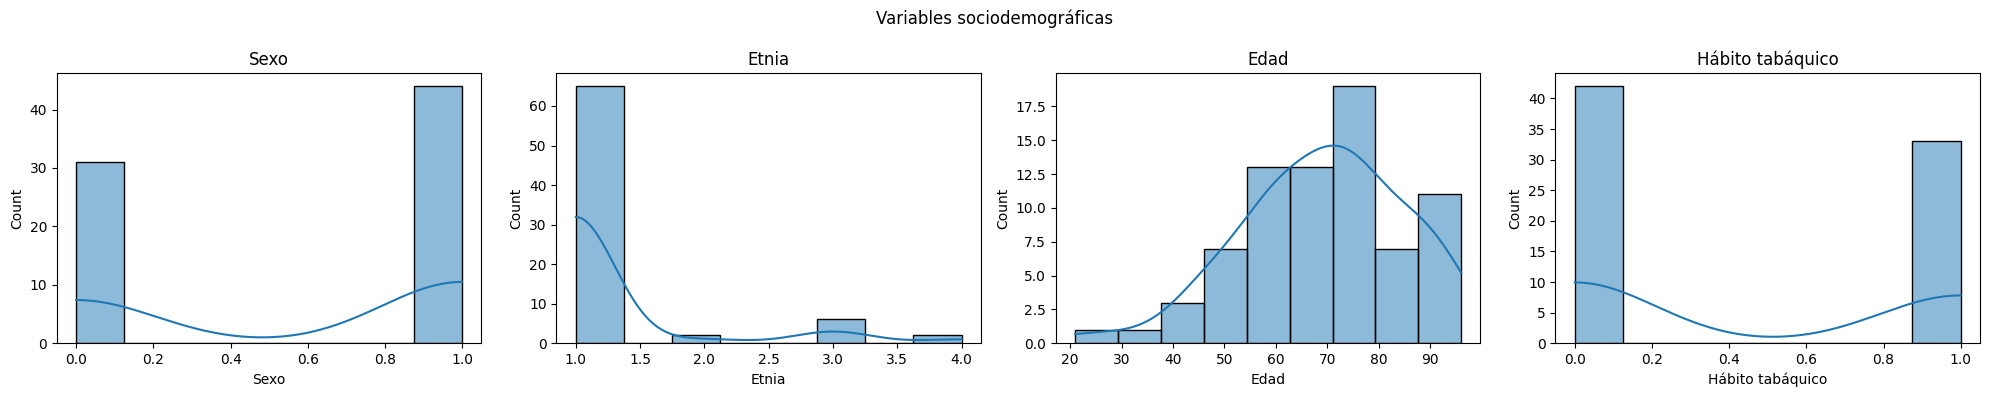

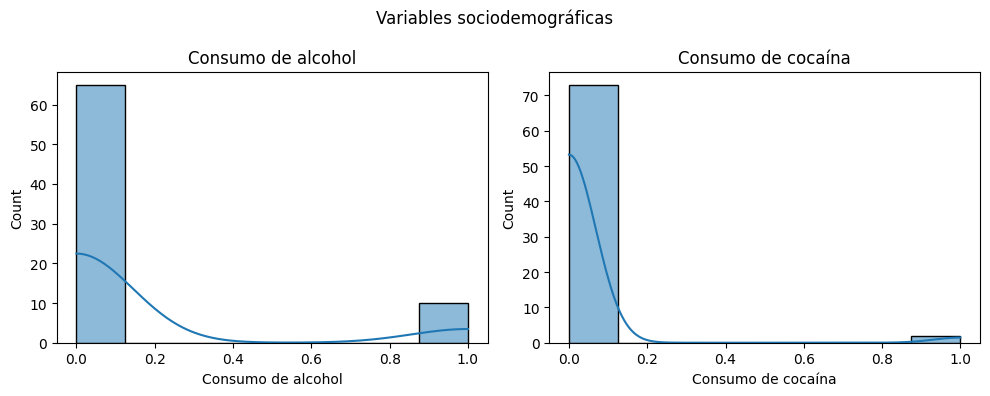


🧩 Bloque: Comorbilidades antes de la vasculitis


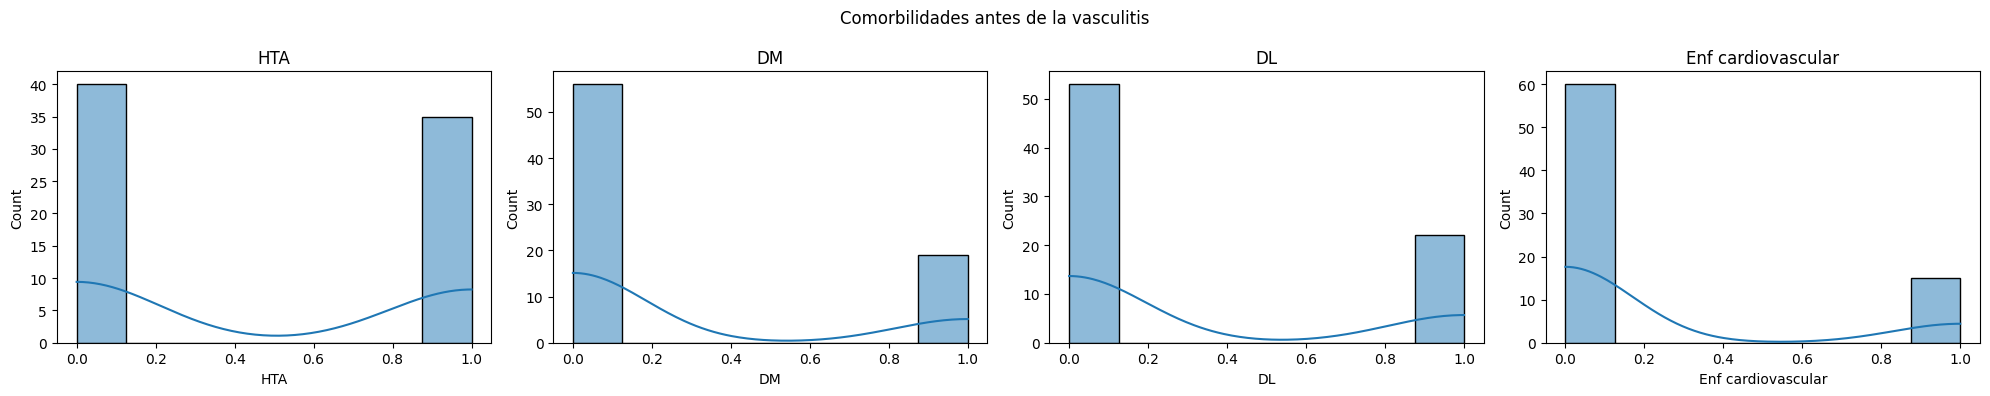

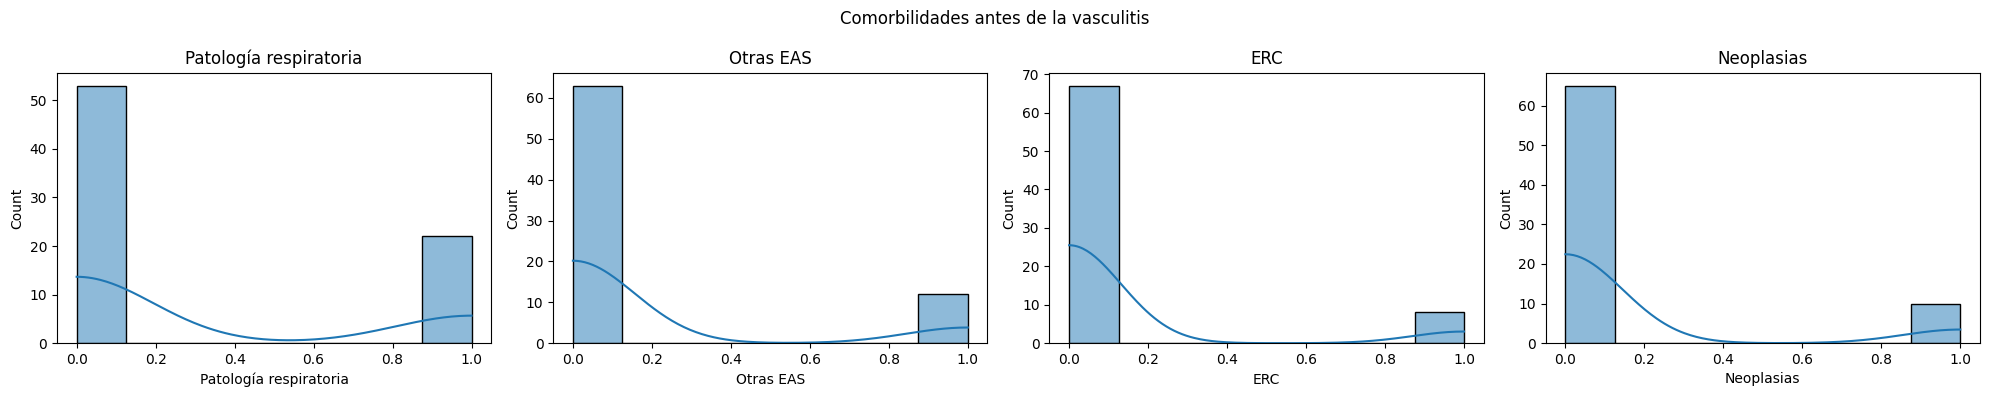

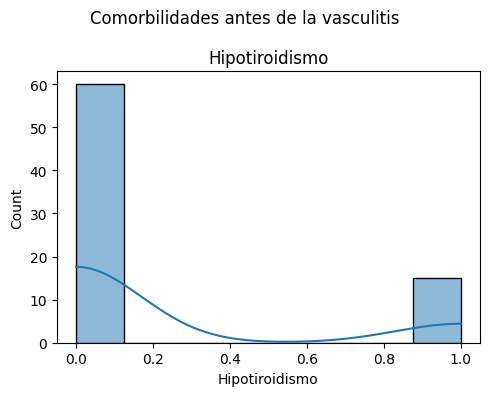


🧩 Bloque: Sospecha desencadenante


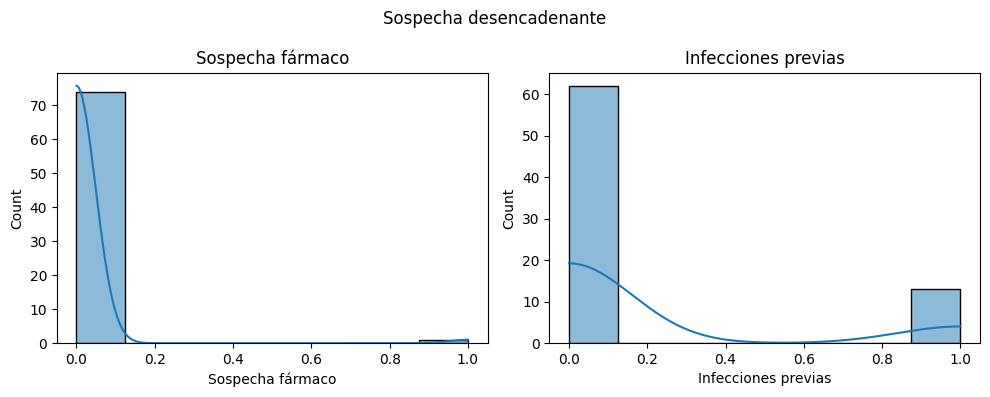


🧩 Bloque: Vasculitis asociadas a ANCA


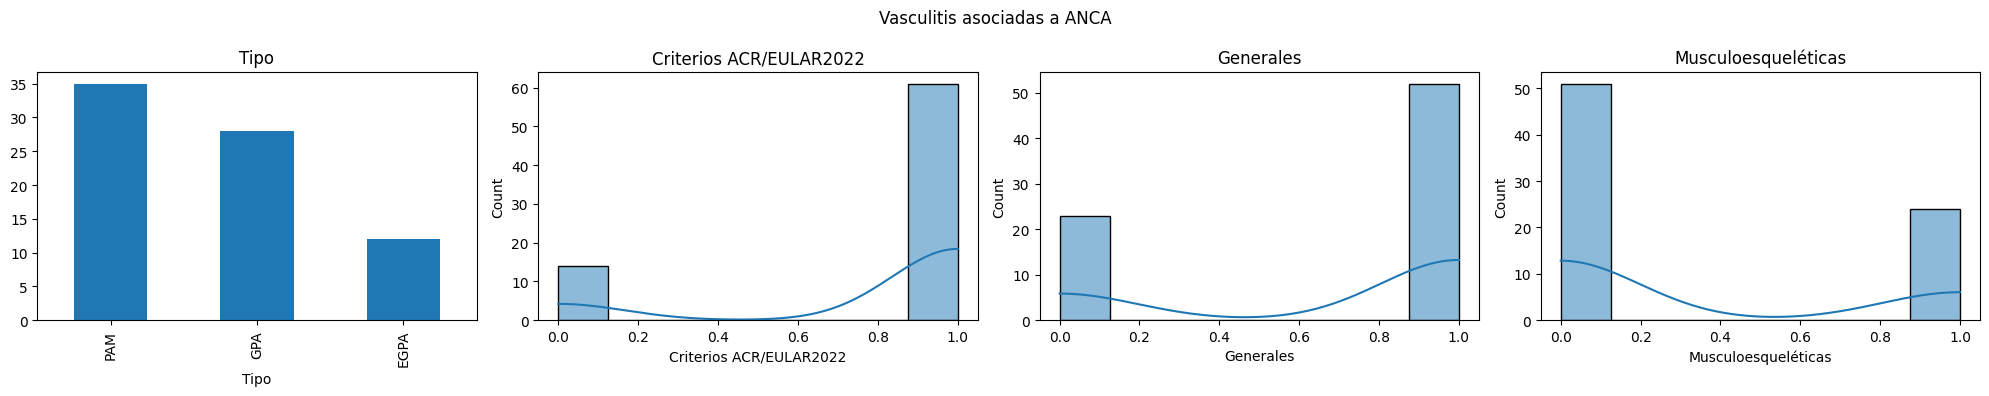

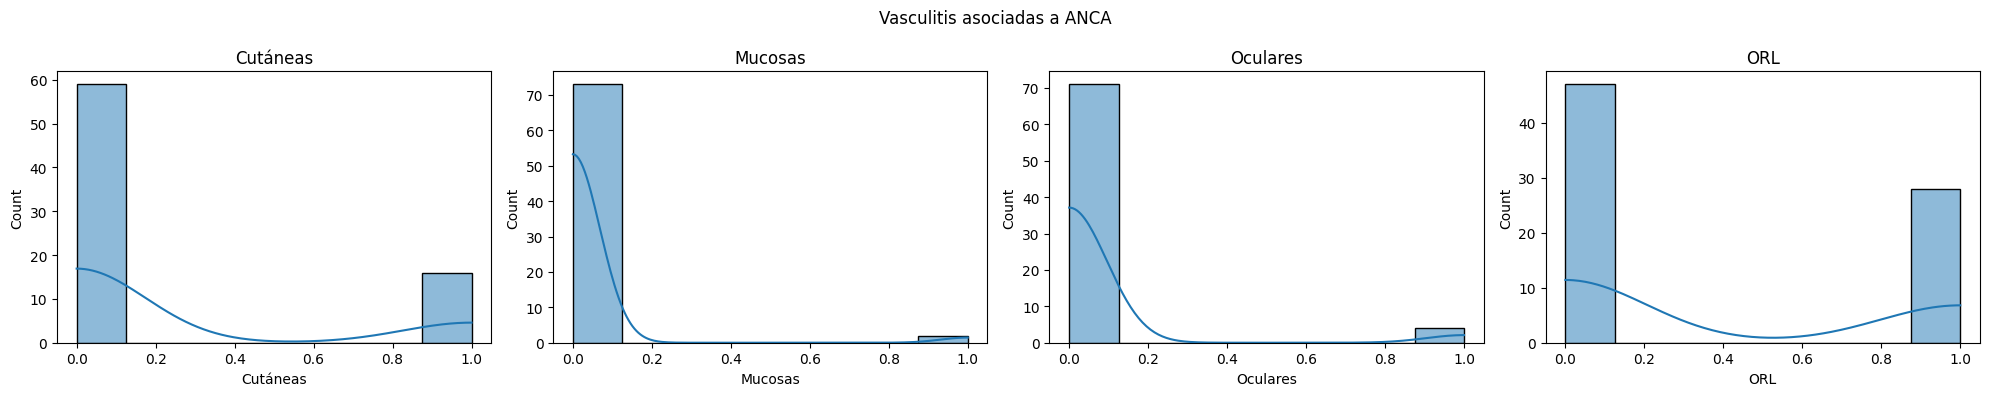

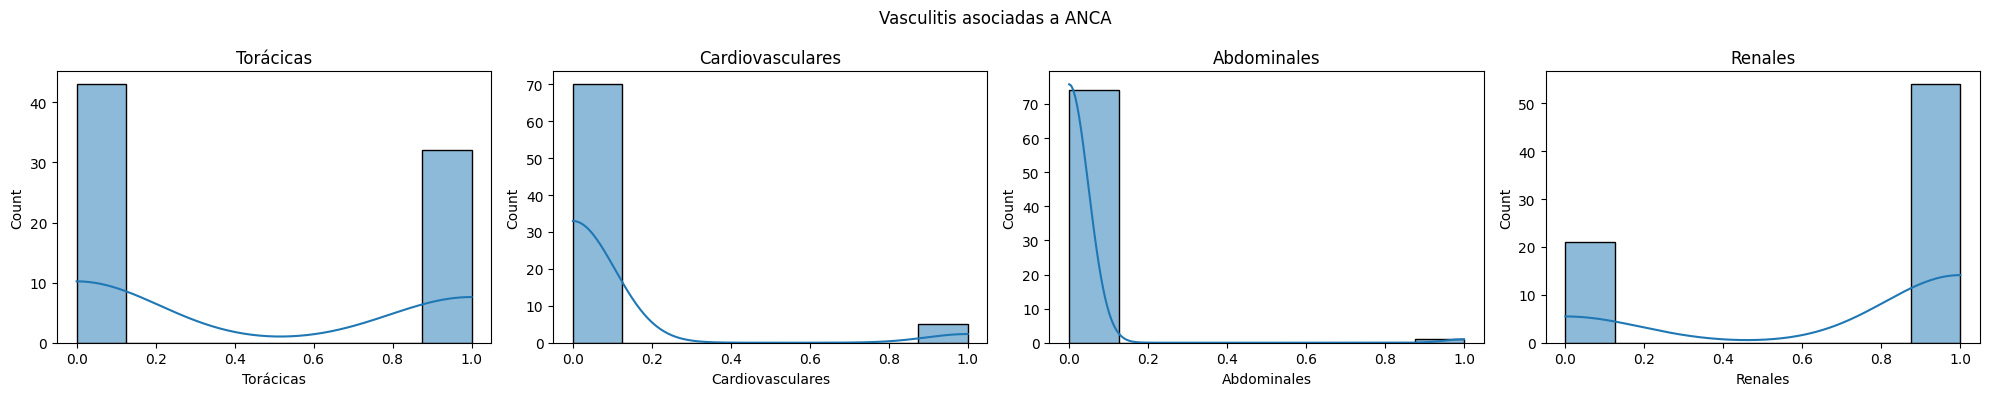

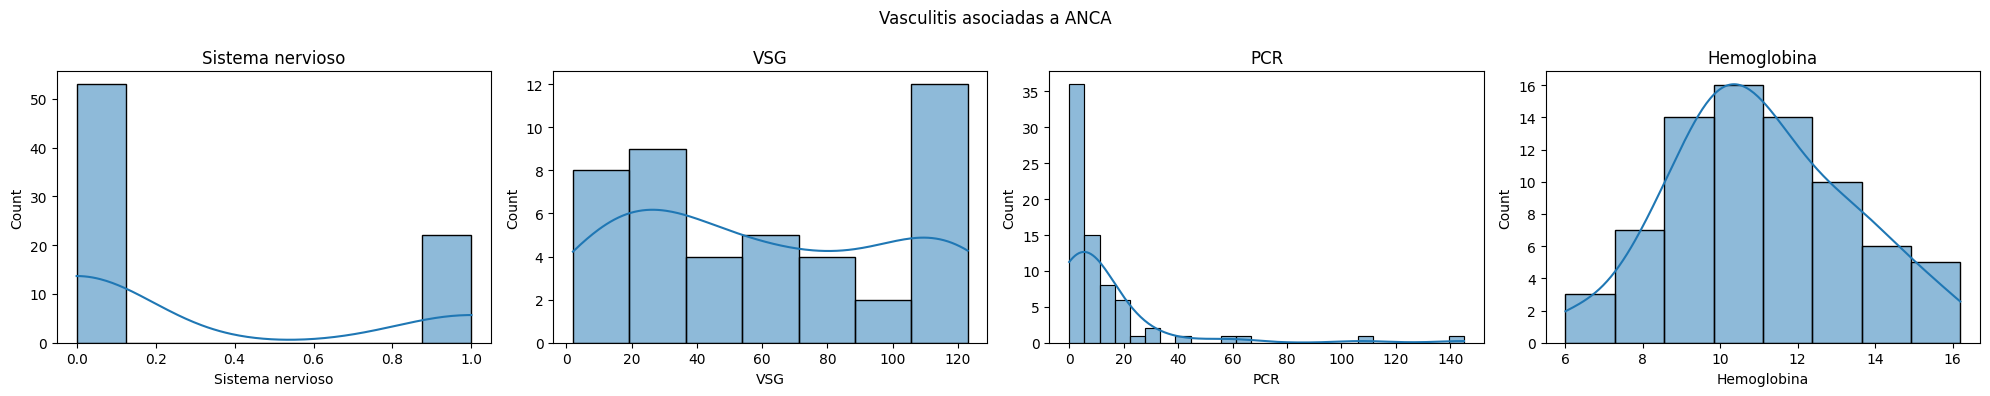

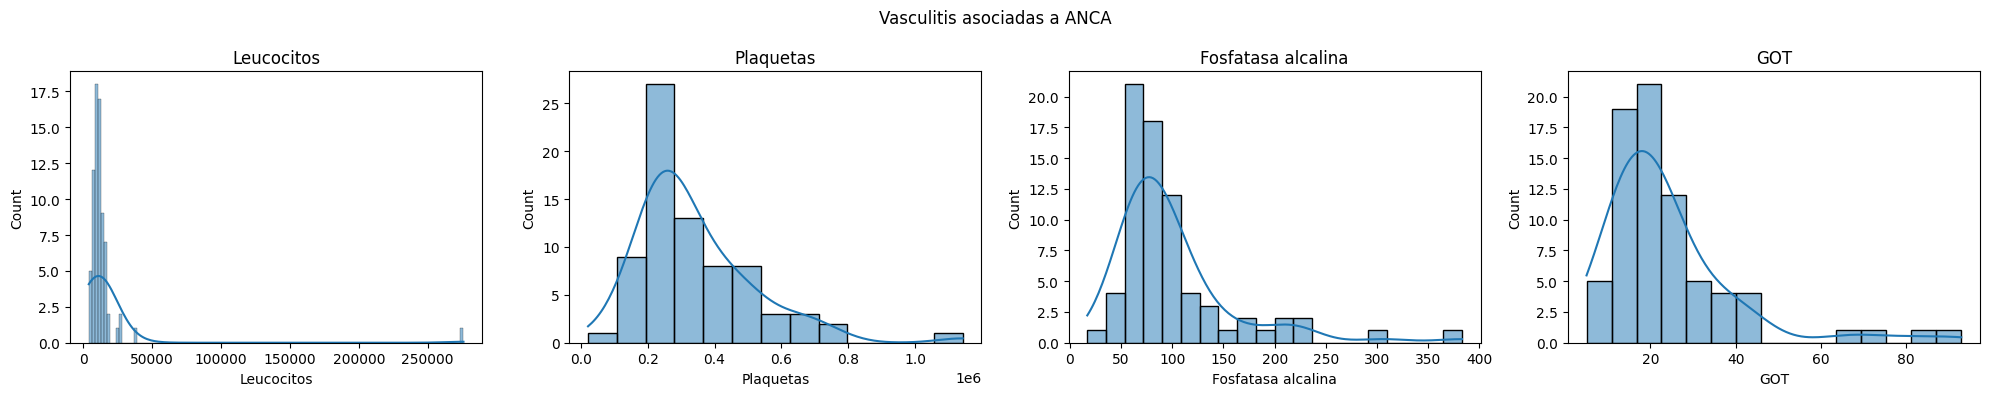

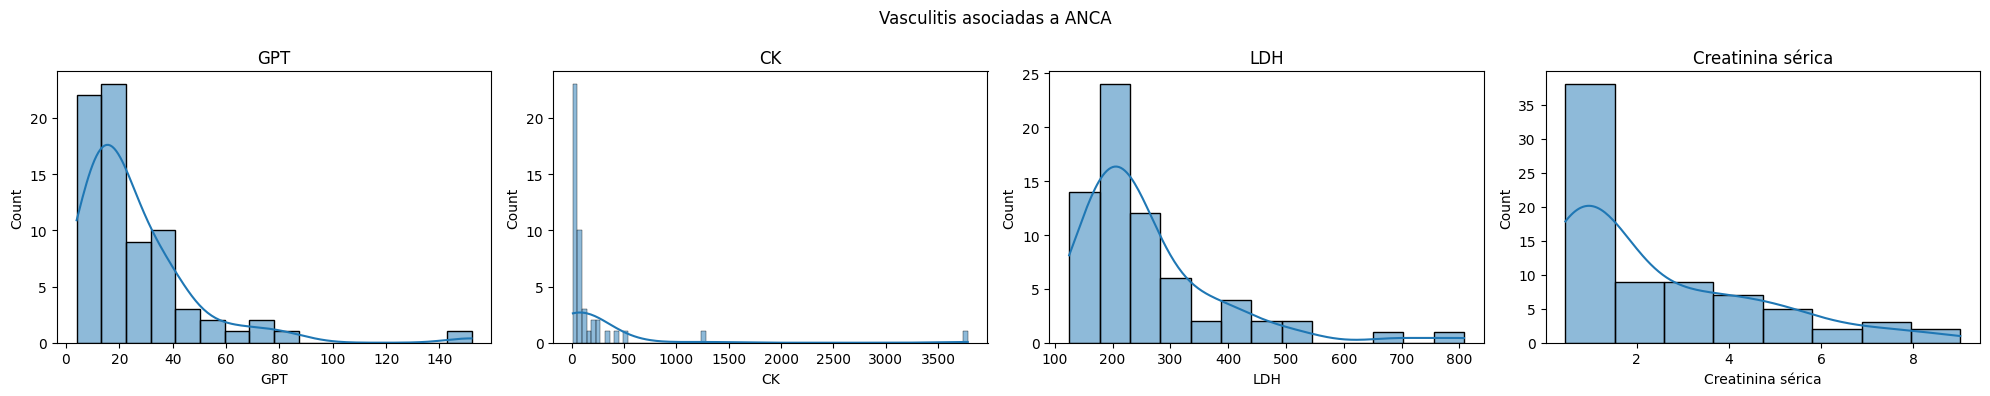

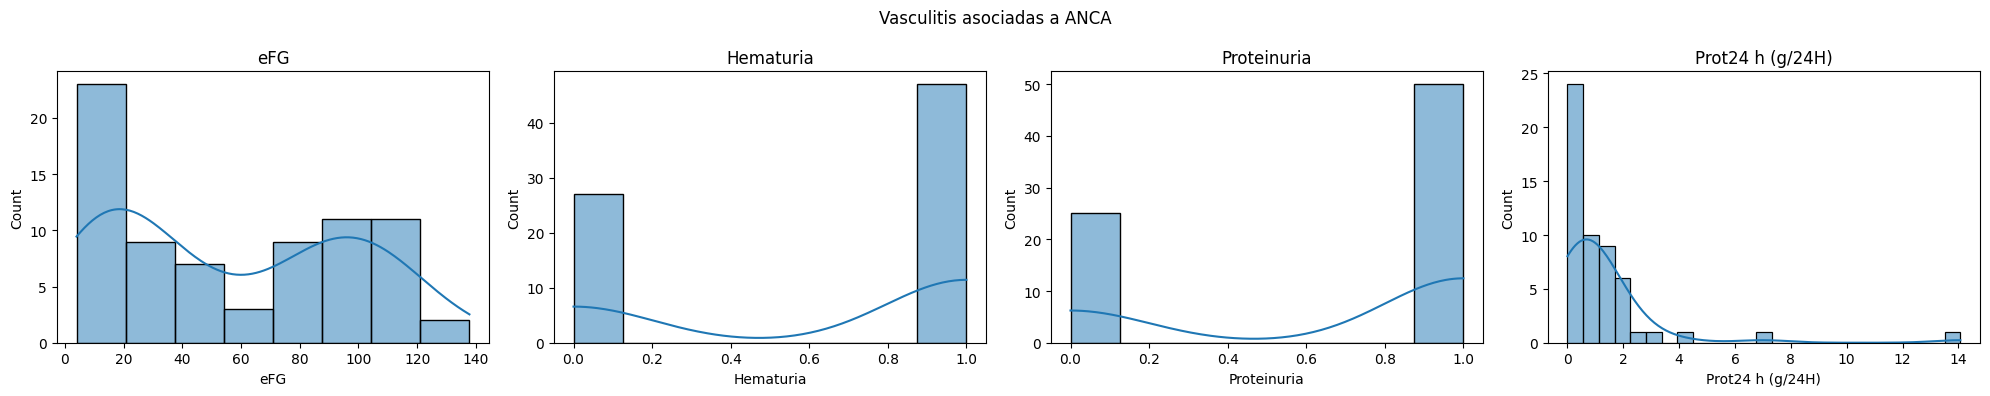

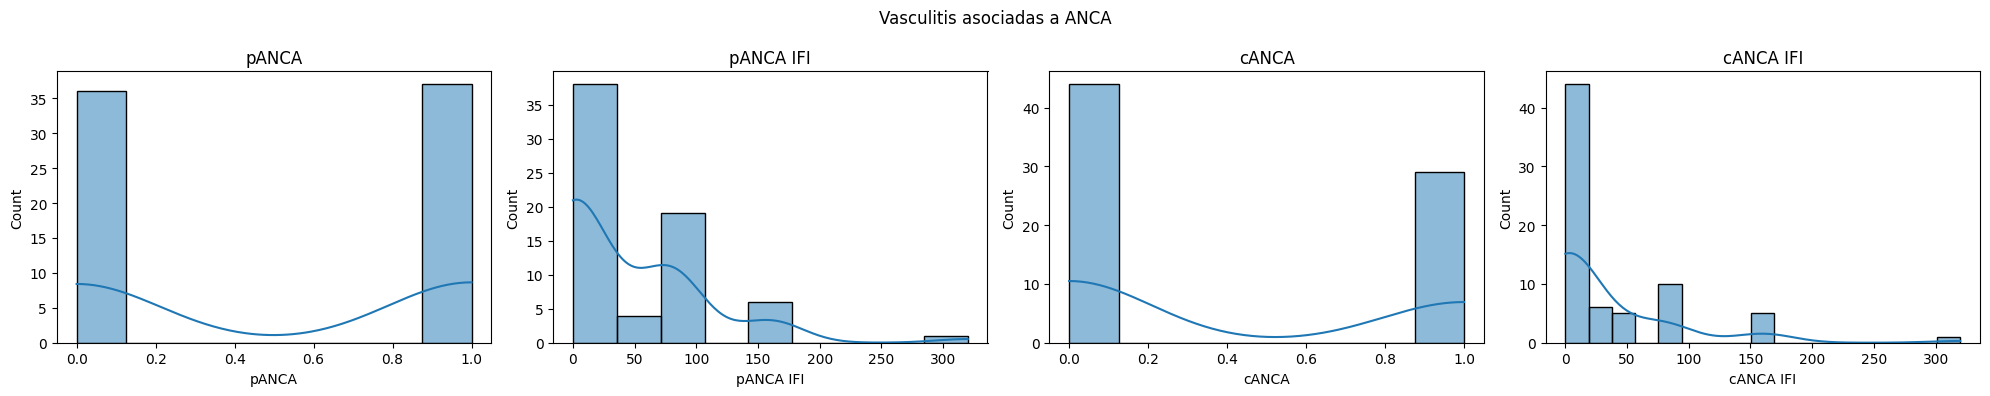

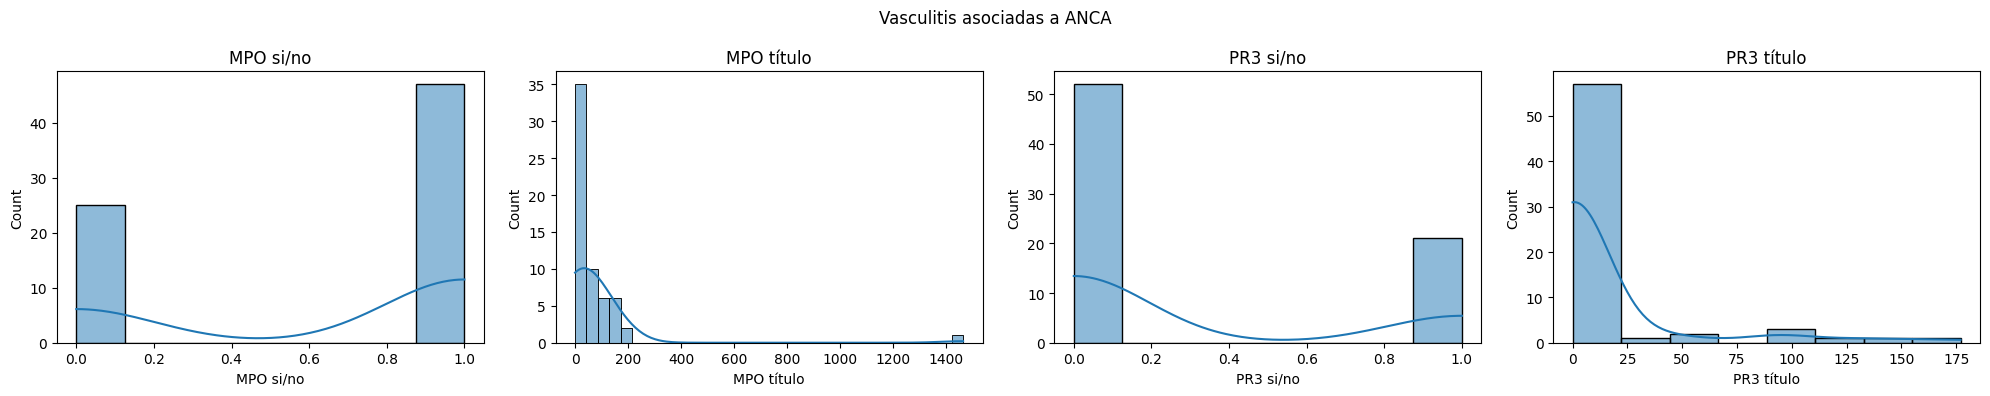

C:\Users\Jorge Morales\AppData\Local\Temp\ipykernel_30372\2382987143.py:93: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


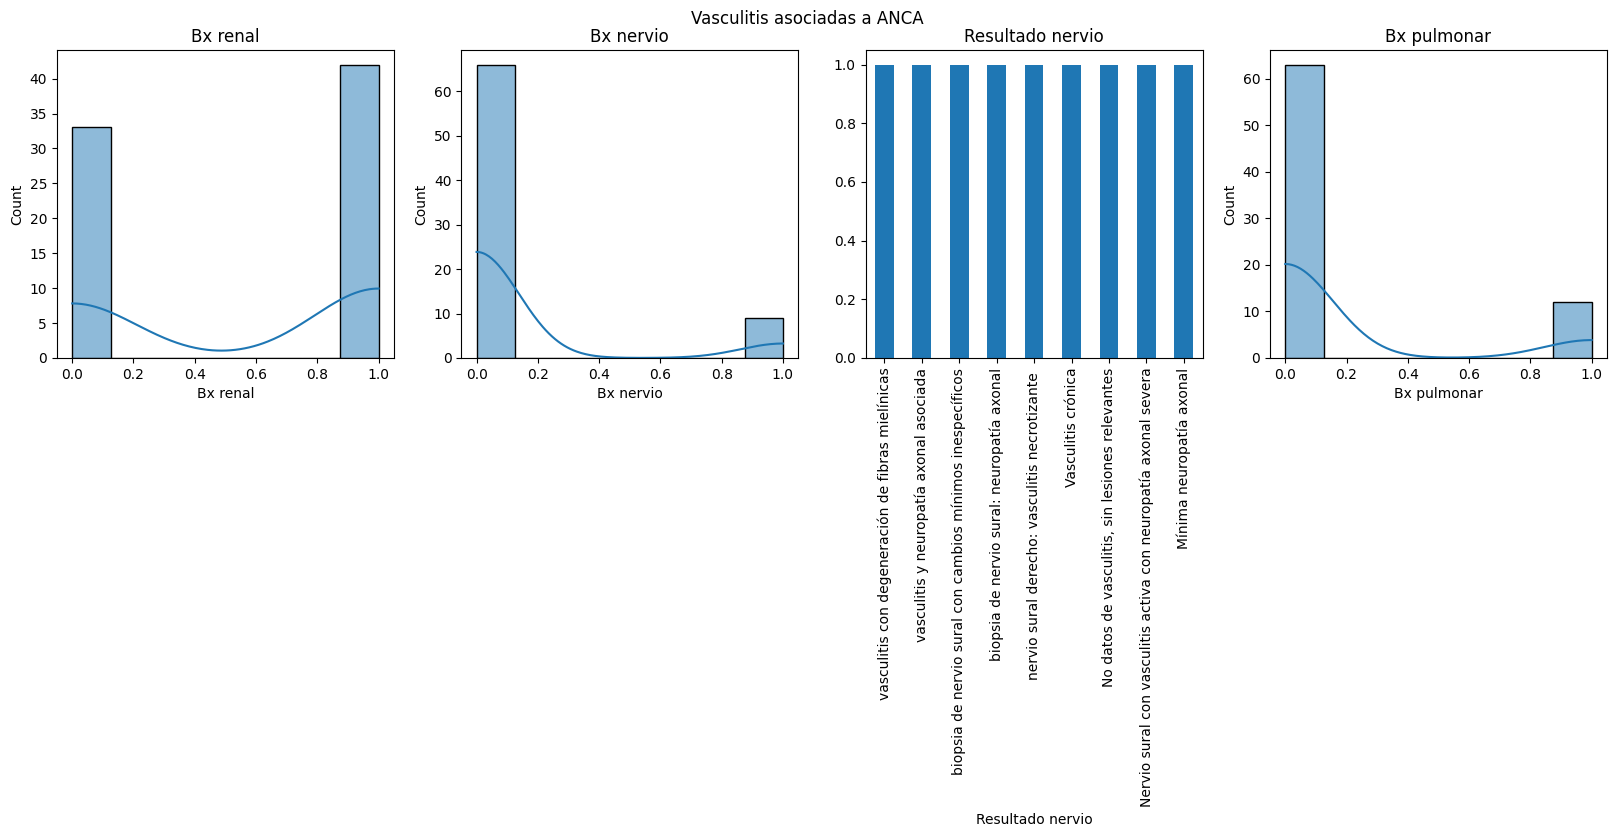

C:\Users\Jorge Morales\AppData\Local\Temp\ipykernel_30372\2382987143.py:93: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


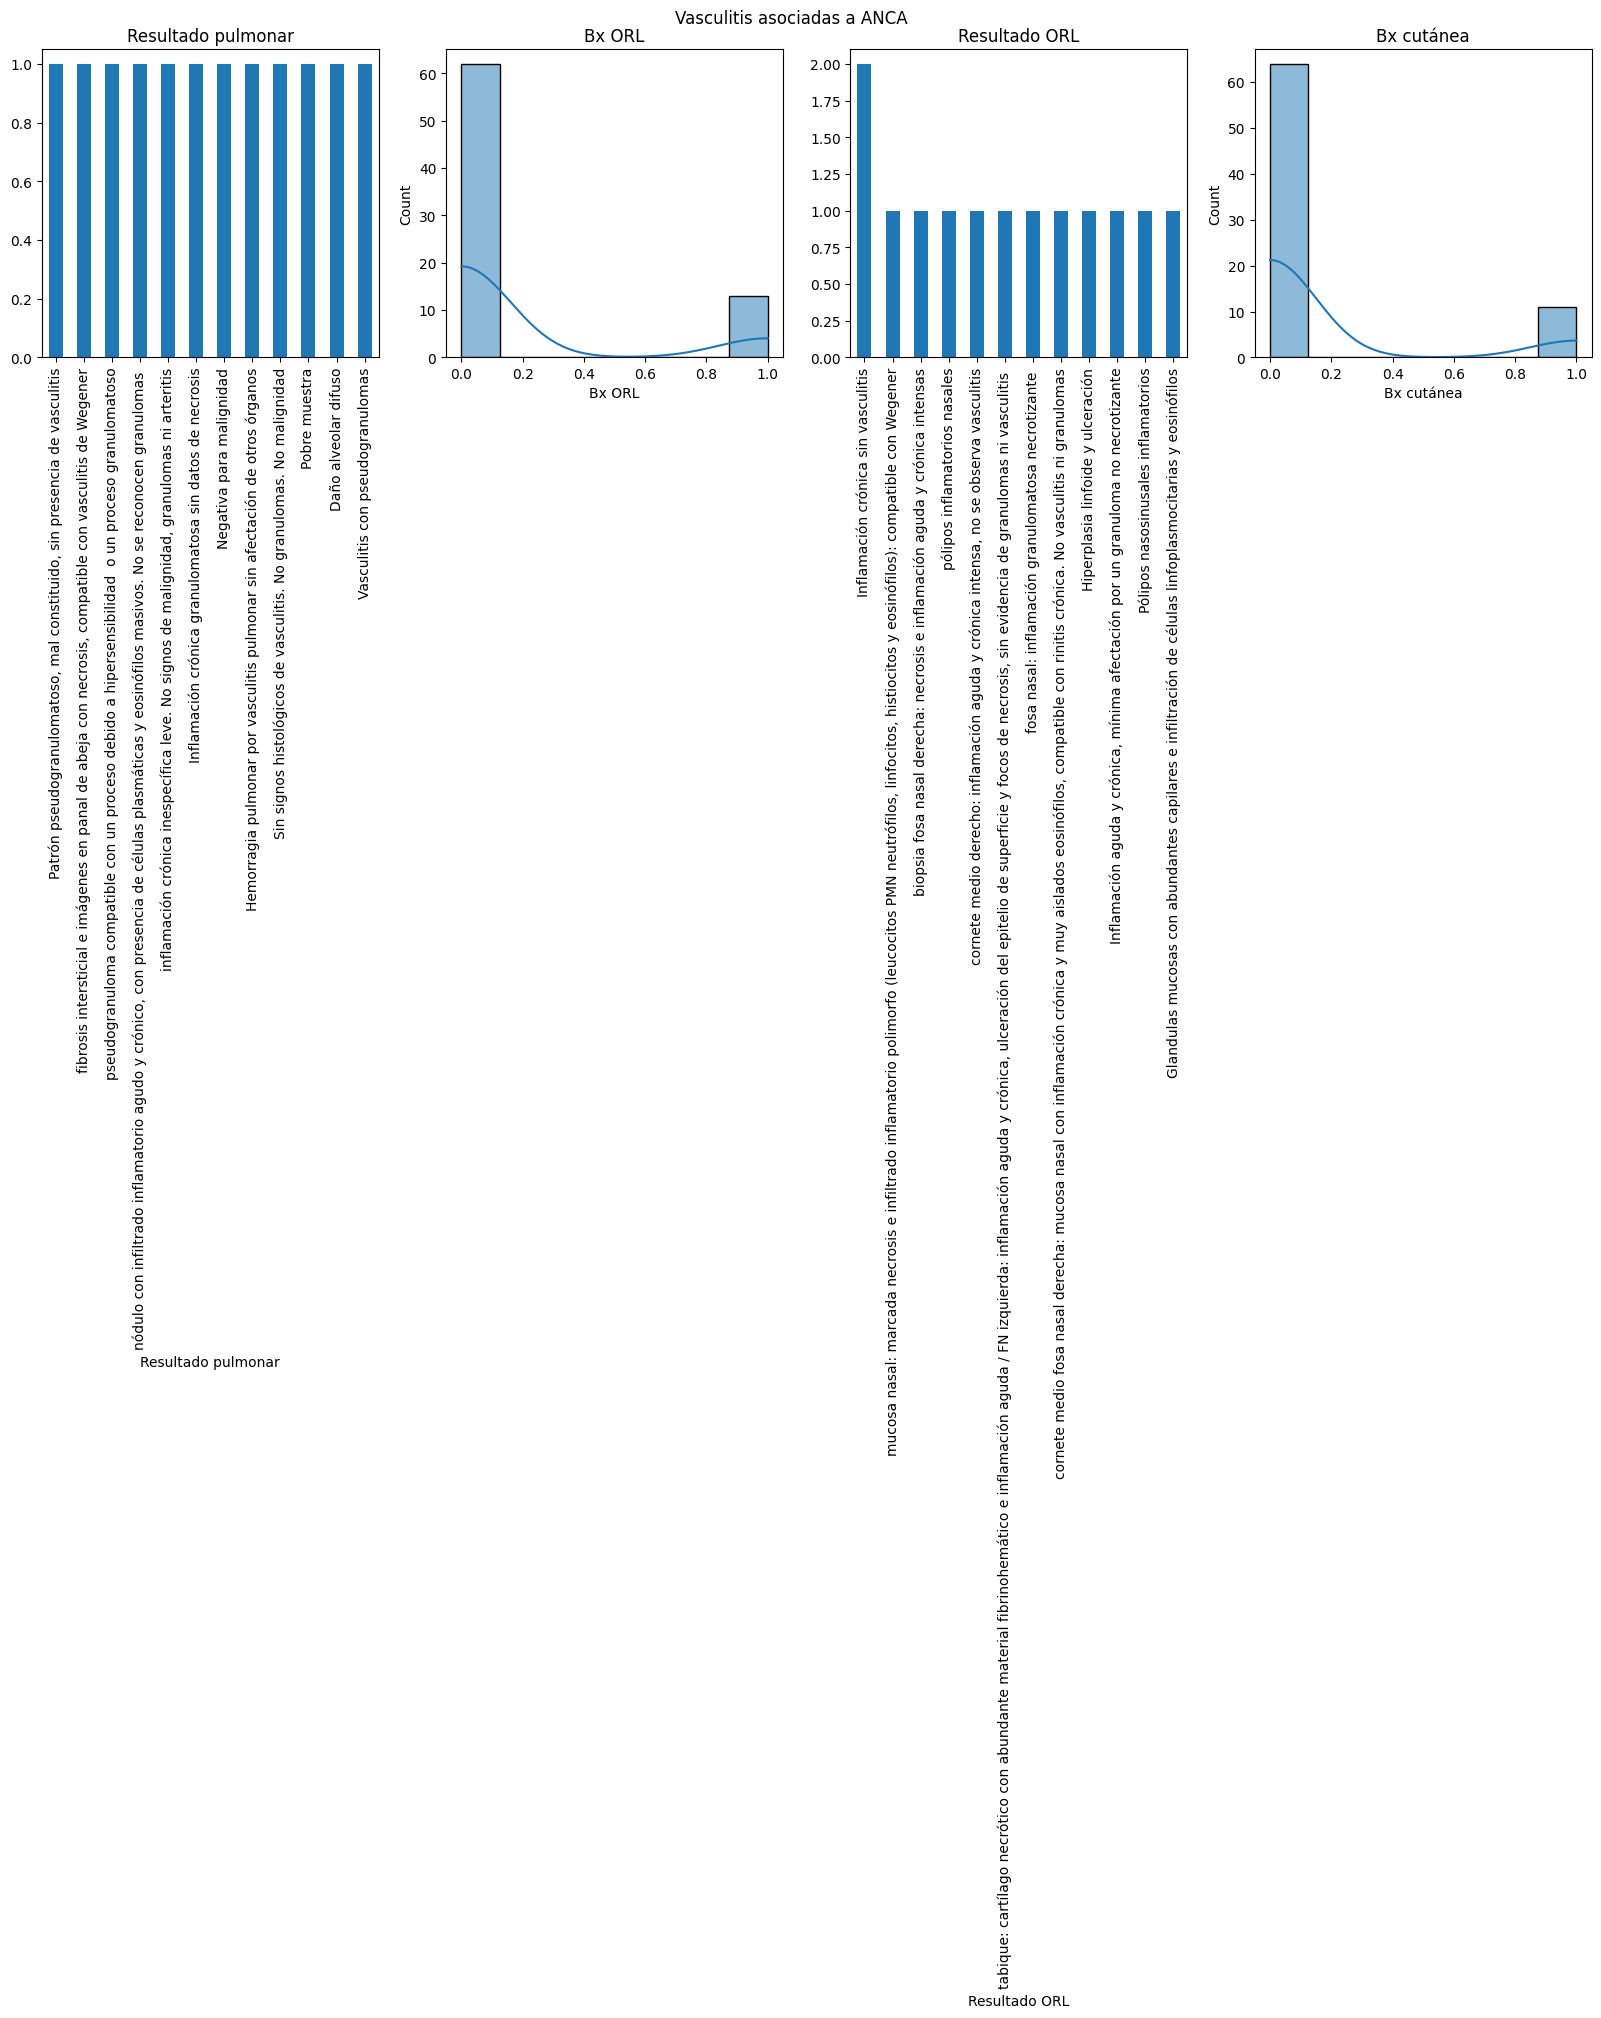

C:\Users\Jorge Morales\AppData\Local\Temp\ipykernel_30372\2382987143.py:93: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


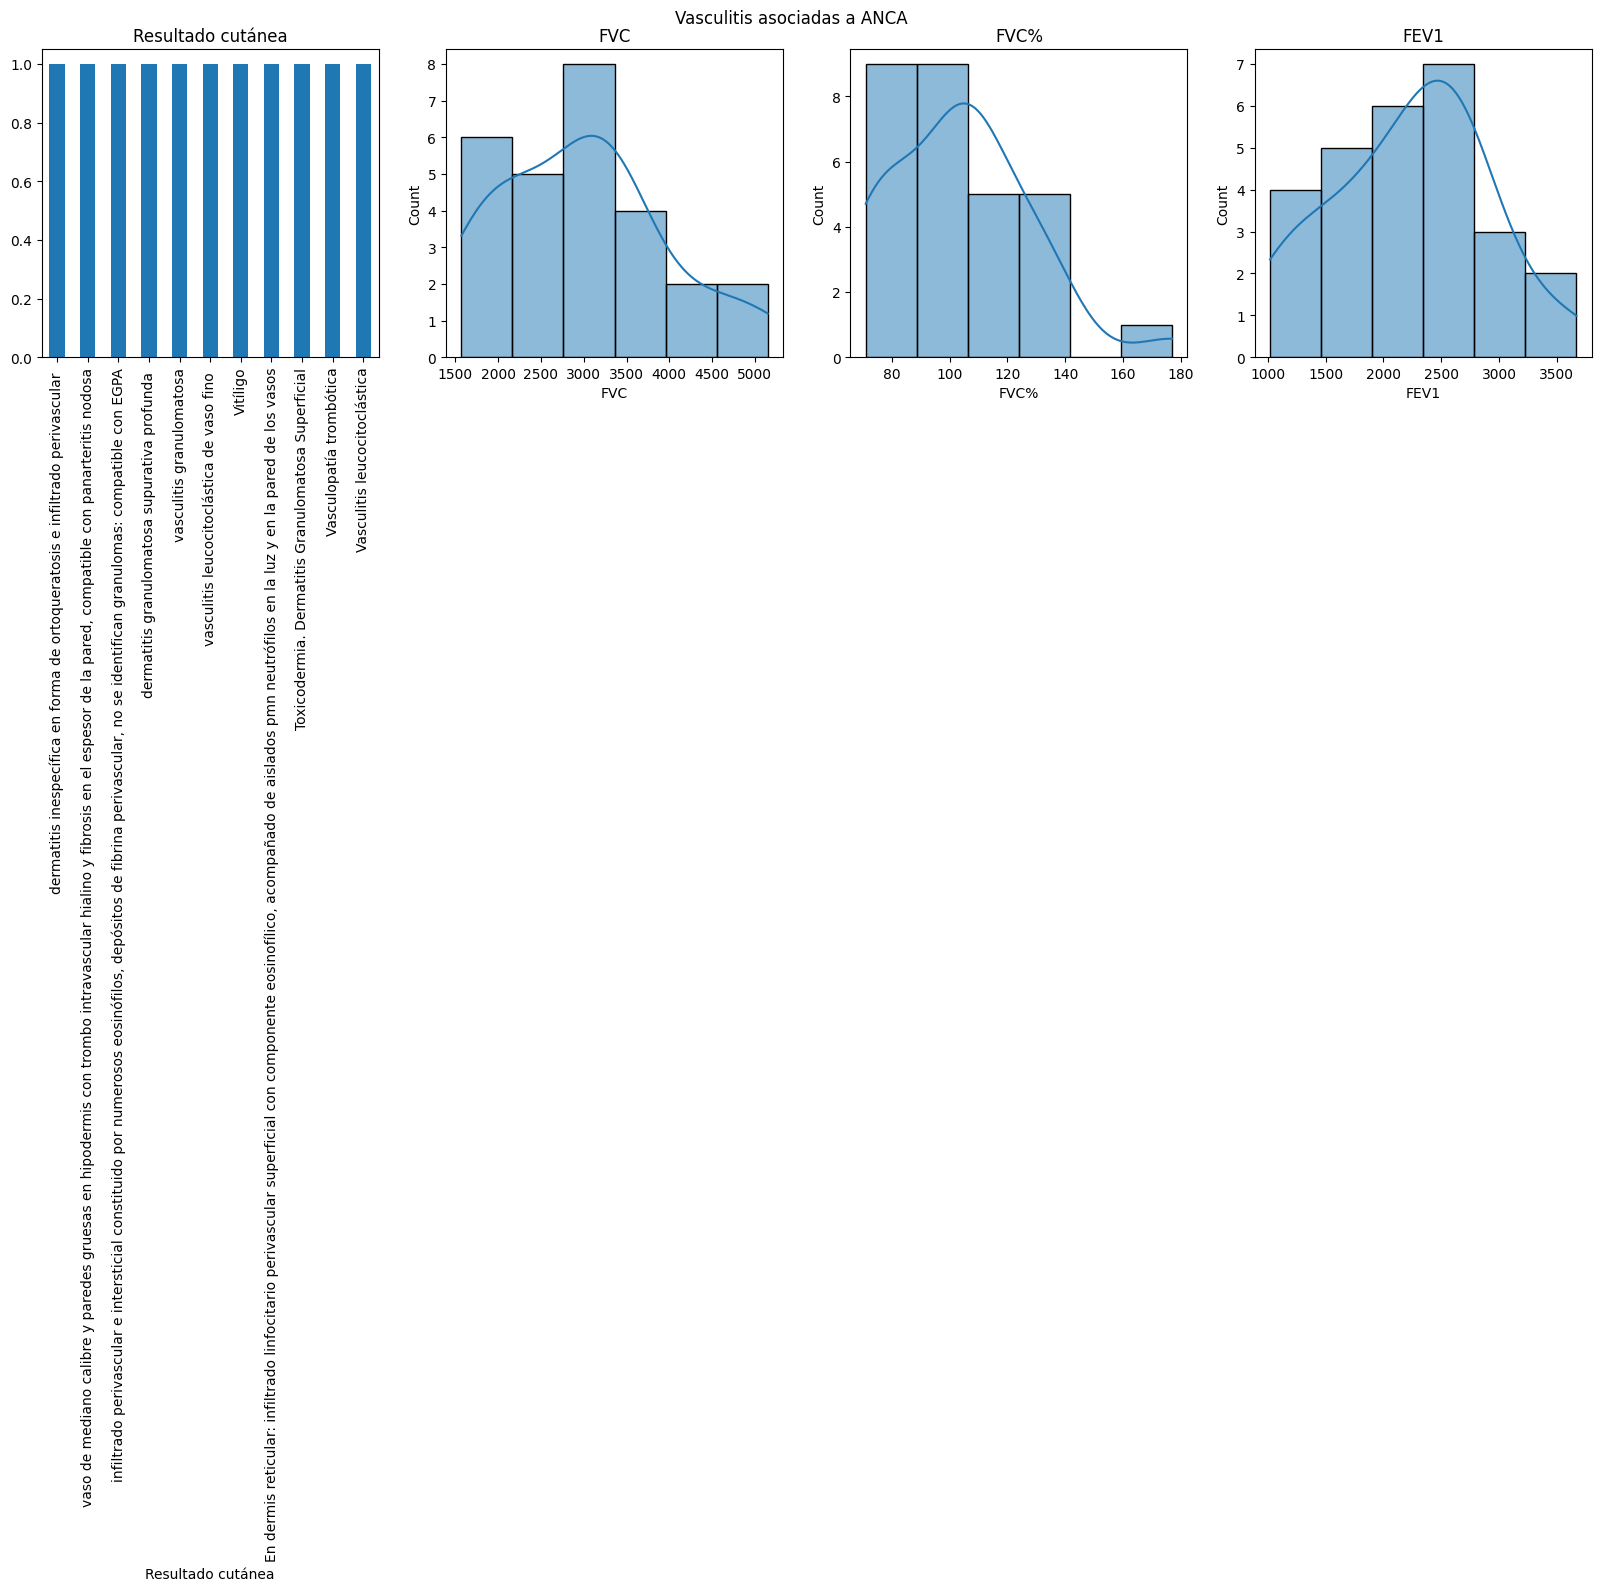

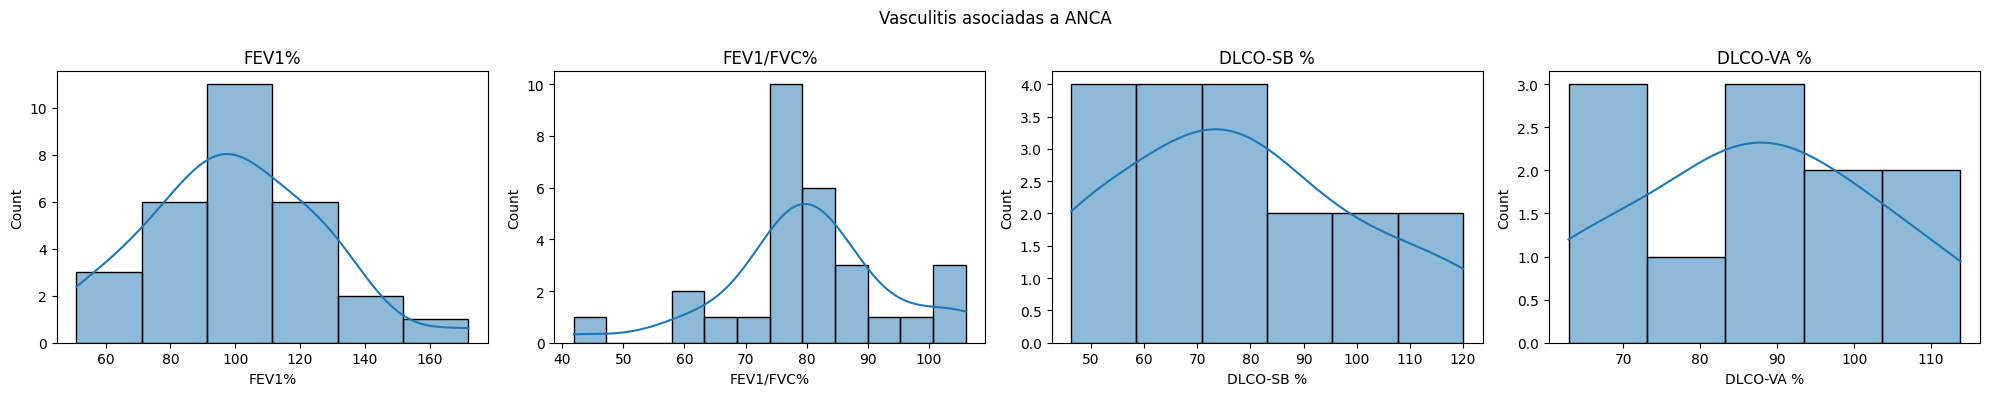

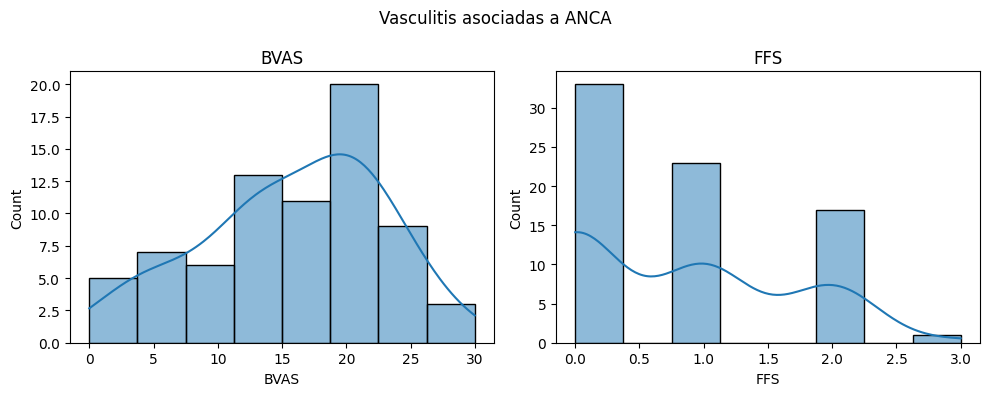


🧩 Bloque: Tratamiento


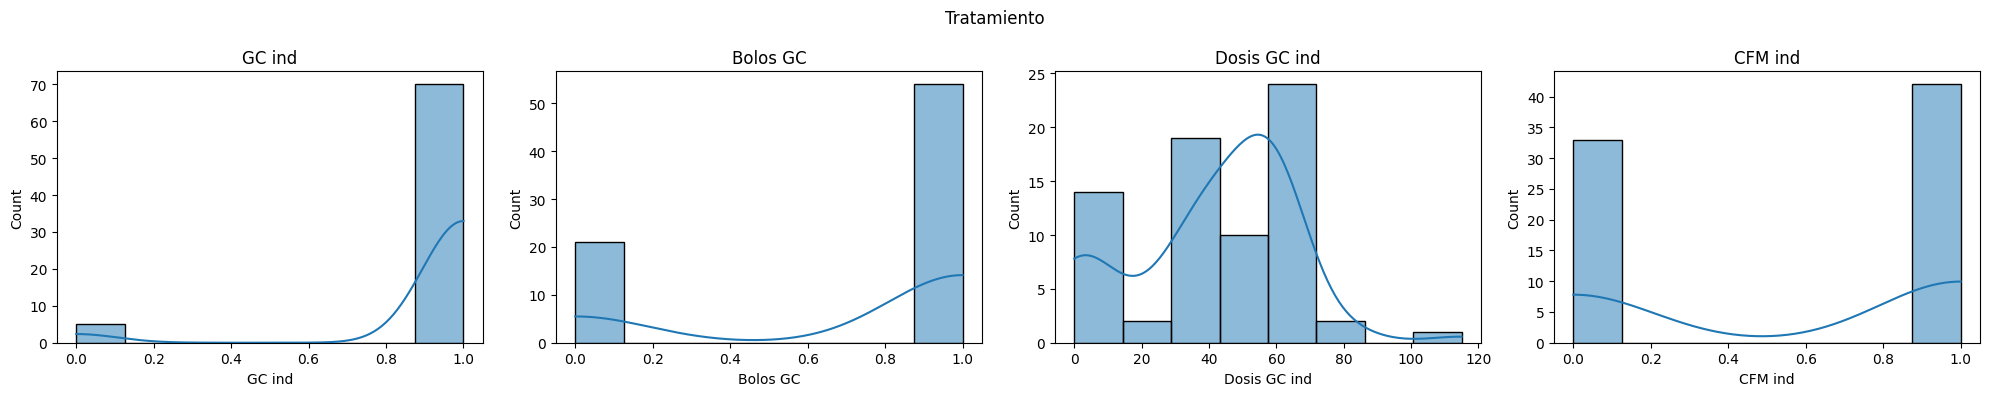

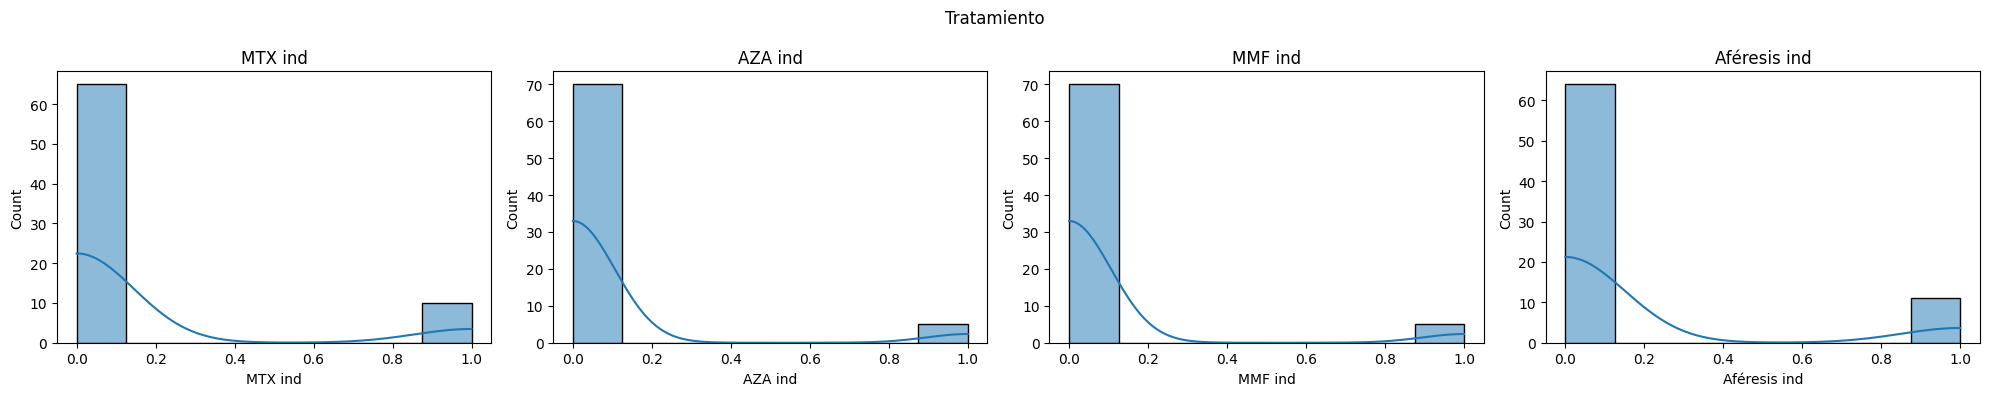

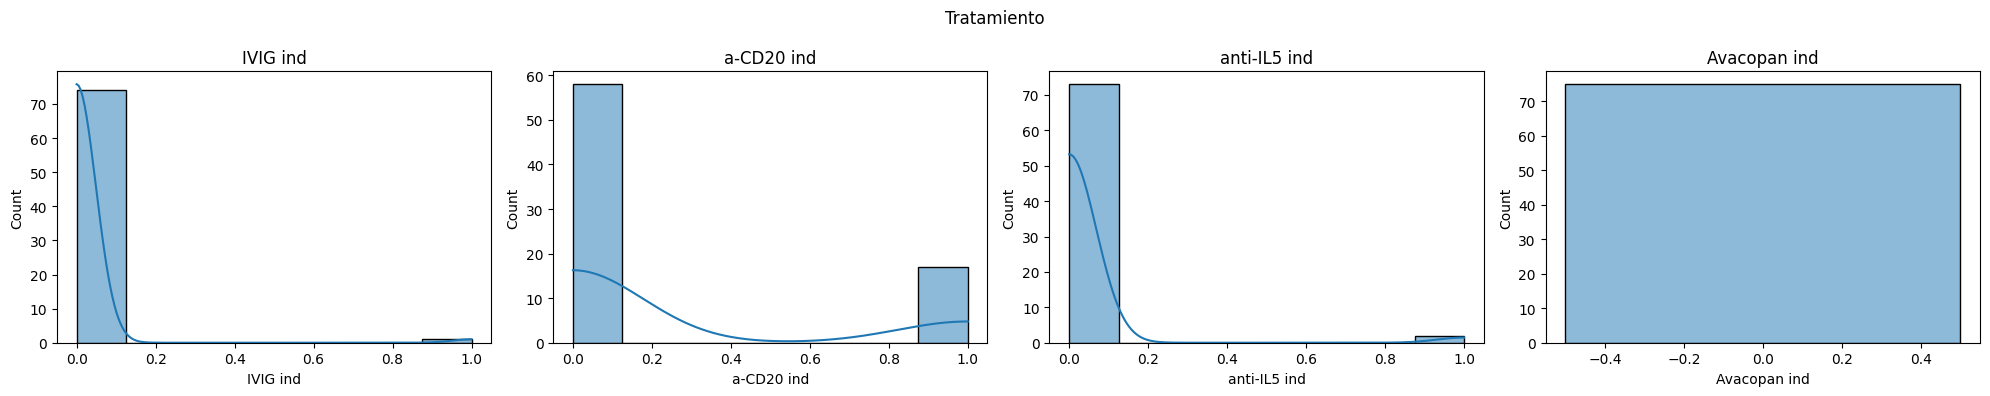

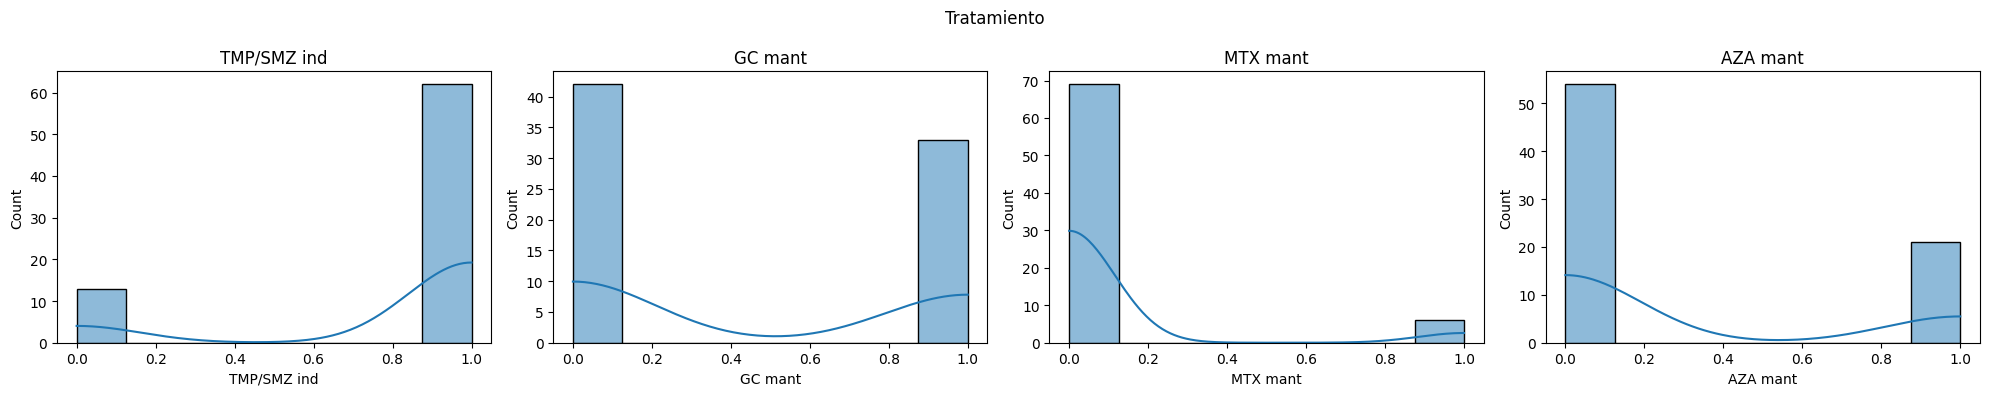

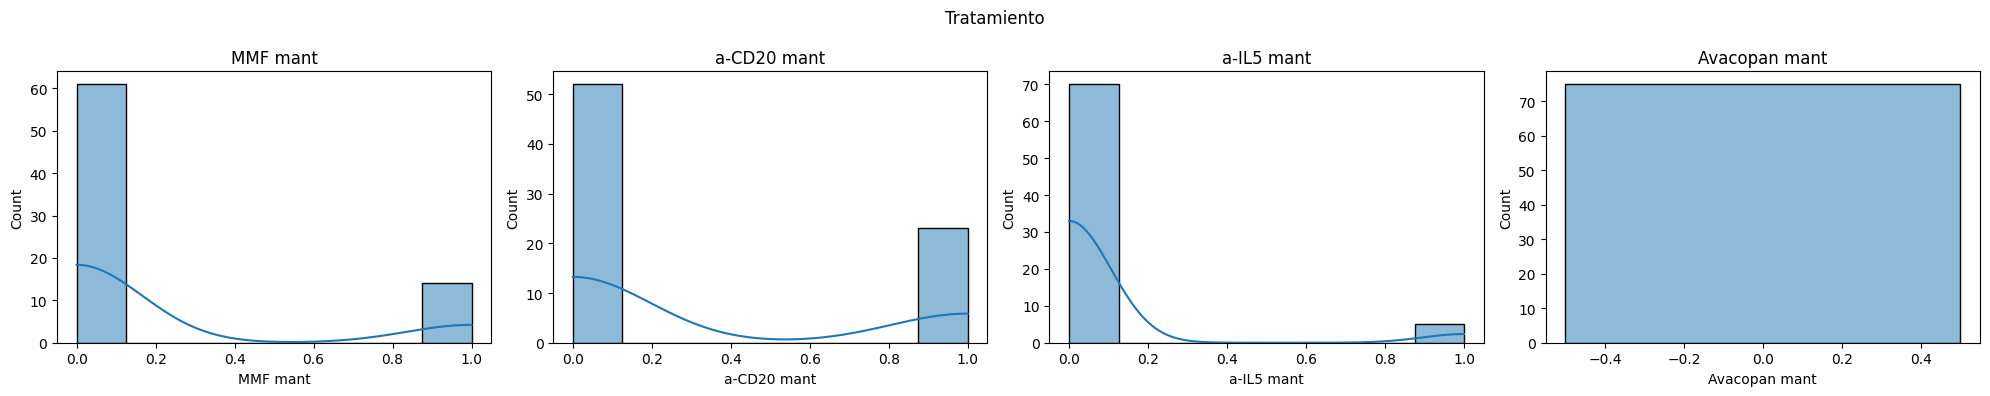


🧩 Bloque: Evolución


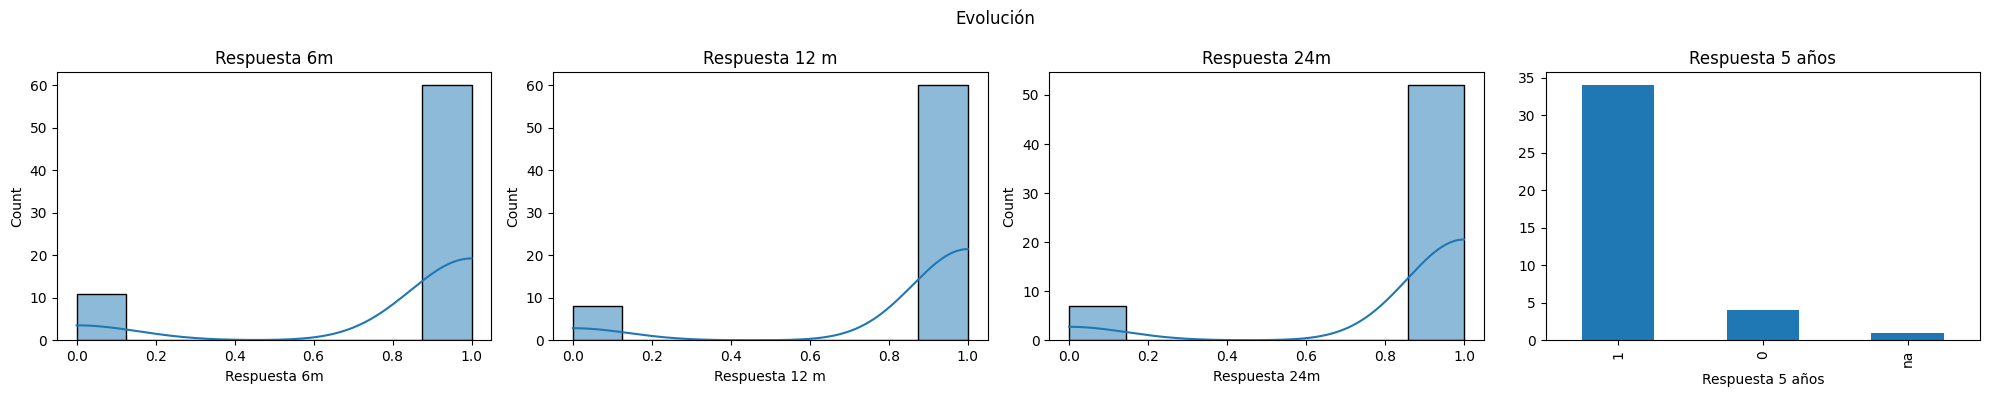

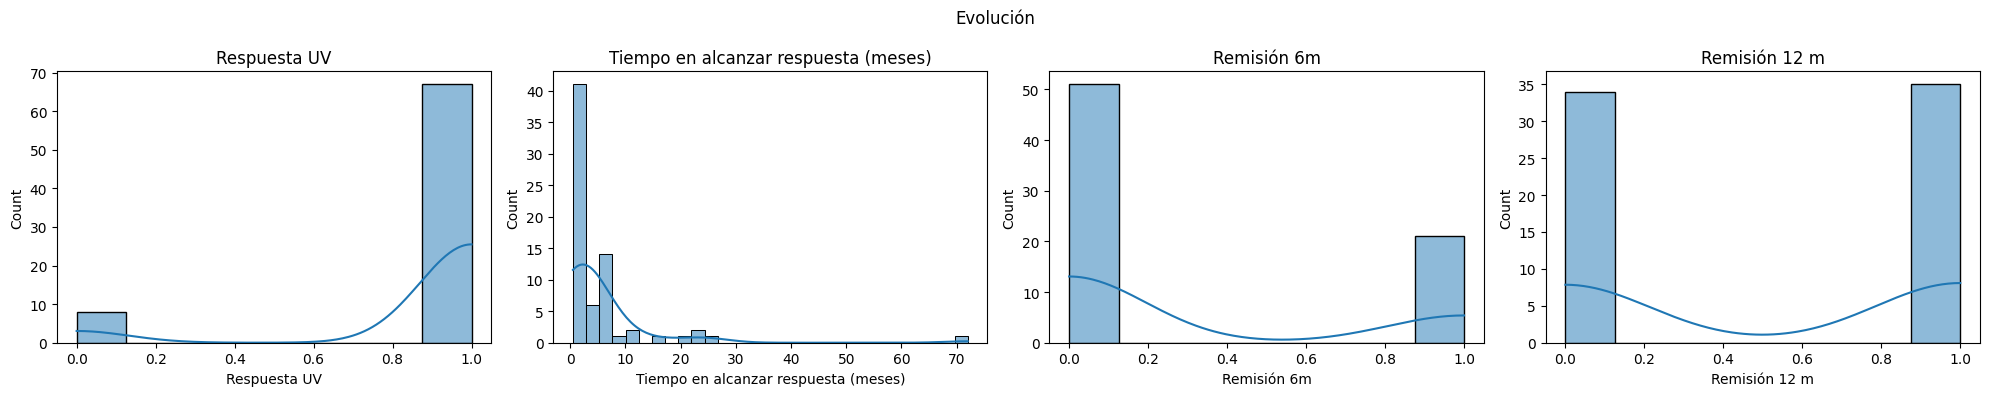

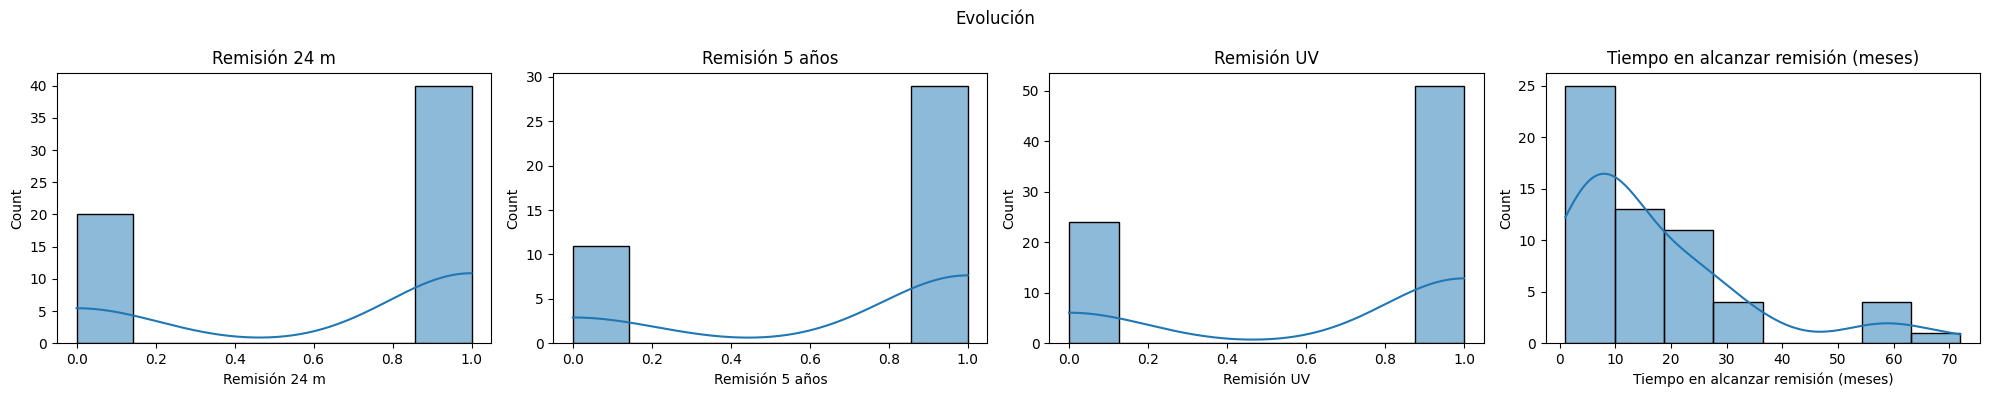

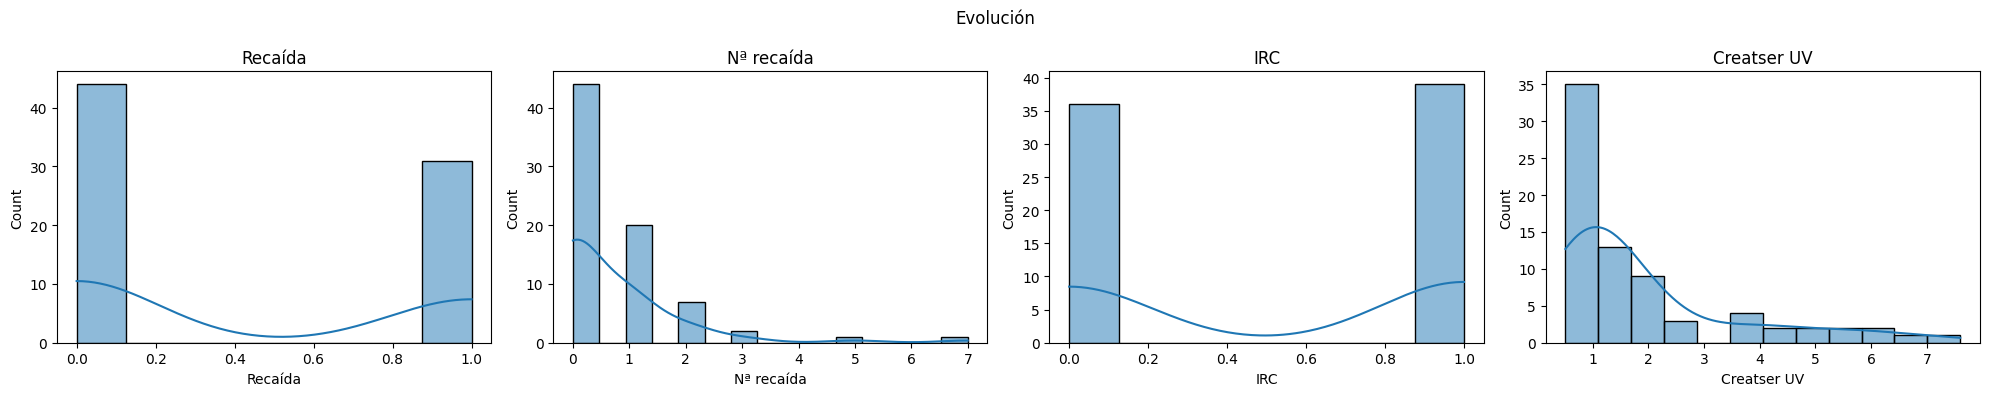

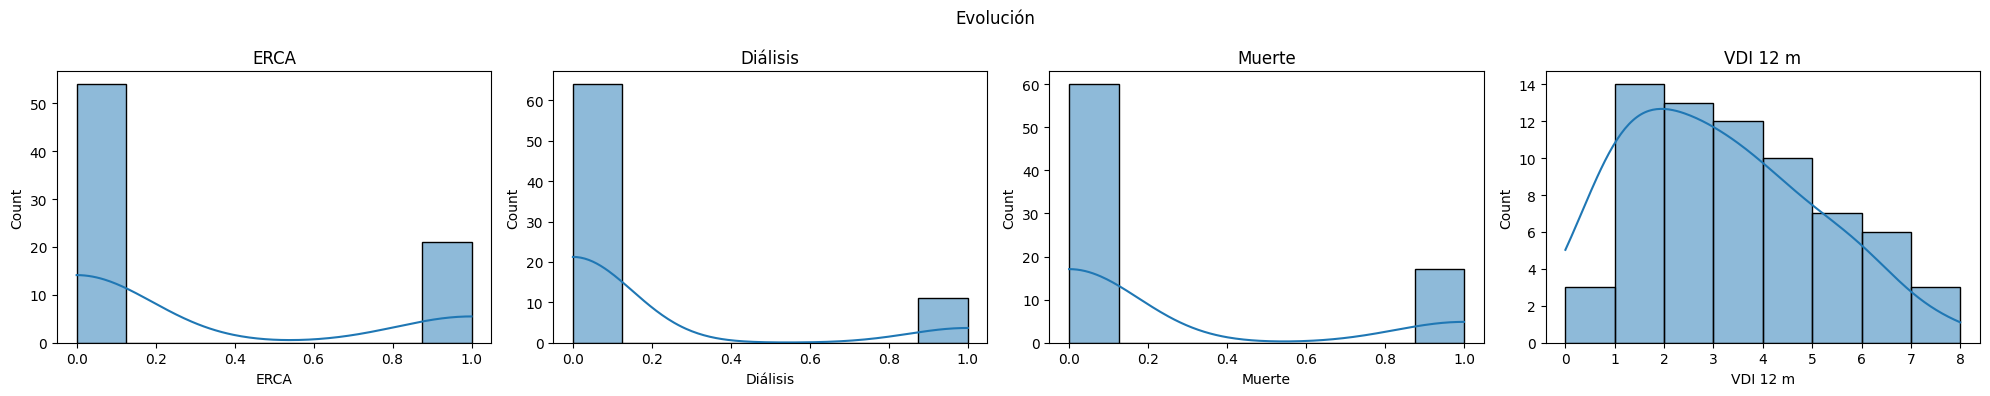

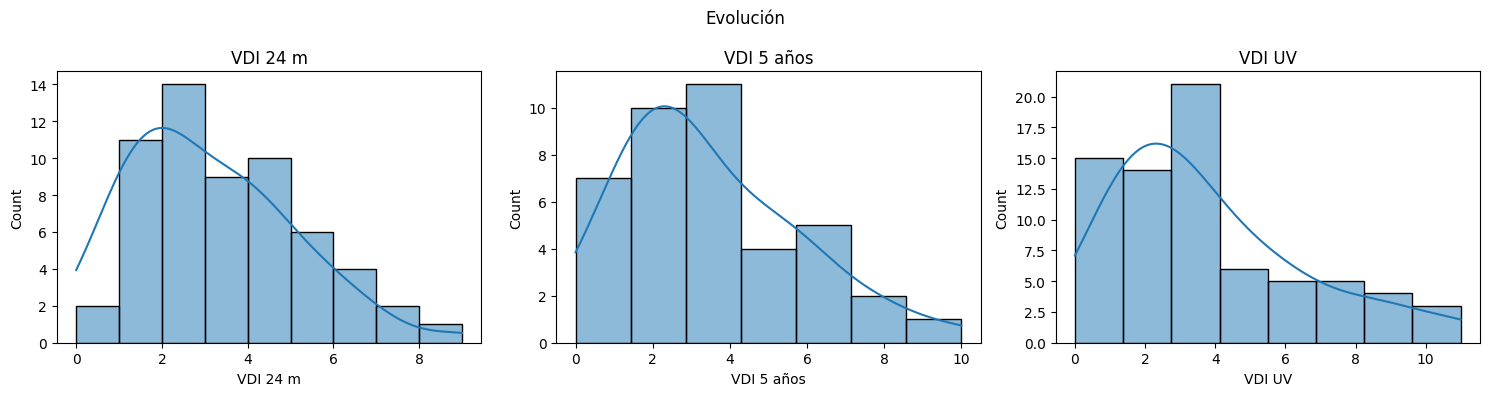

In [96]:
# Recorremos la estructura de forma recursiva
for bloque, contenido in estructura_variables.items():
    print(f"\n🧩 Bloque: {bloque}")
    vars_bloque = extraer_variables(contenido)
    mostrar_histogramas(df, vars_bloque, titulo_bloque=bloque)

📌 Columnas con más valores nulos:
Resultado nervio                       88.311688
Muerte.1                               85.714286
DLCO-VA %                              85.714286
Resultado cutánea                      85.714286
Resultado pulmonar                     84.415584
Resultado ORL                          83.116883
DLCO-SB %                              76.623377
FVC                                    64.935065
FEV1                                   64.935065
FVC%                                   62.337662
FEV1%                                  62.337662
FEV1/FVC%                              62.337662
Respuesta 5 años                       49.350649
Remisión 5 años                        48.051948
VDI 5 años                             48.051948
Resultado renal                        44.155844
VSG                                    42.857143
CK                                     40.259740
Prot24 h (g/24H)                       29.870130
Tiempo en alcanzar remisión (meses)

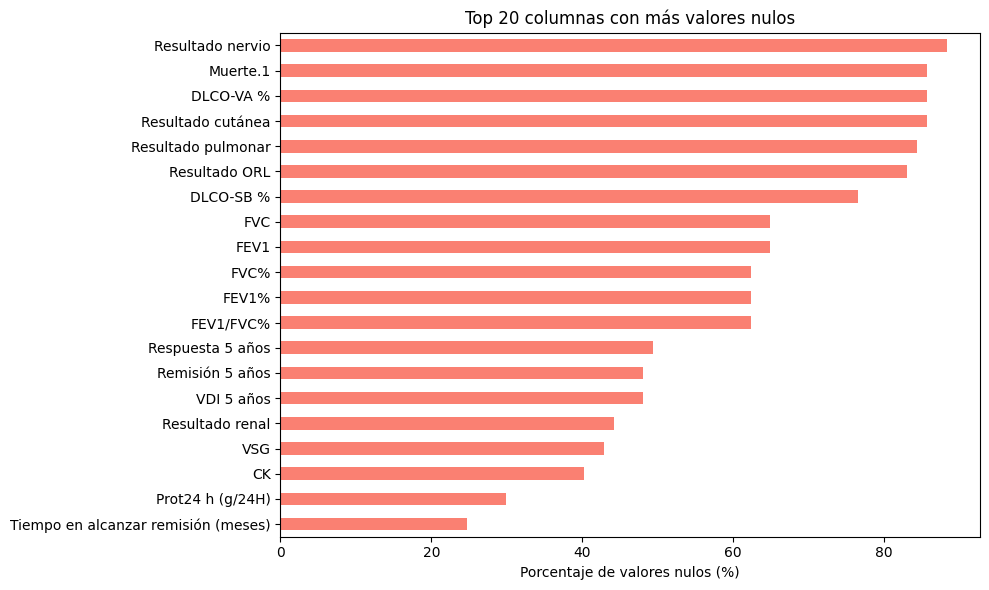

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset actualizado con columnas renombradas
df = pd.read_excel("dataset_renombrado.xlsx")

# Calcular porcentaje de nulos por columna
nulos = df.isnull().mean().sort_values(ascending=False) * 100
nulos = nulos[nulos > 0]  # filtrar solo las columnas que tienen nulos

# Mostrar top 20 columnas con más nulos
print("📌 Columnas con más valores nulos:")
print(nulos.head(20))

# Visualizar con gráfico de barras
plt.figure(figsize=(10, 6))
nulos.head(20).plot(kind='barh', color='salmon')
plt.xlabel("Porcentaje de valores nulos (%)")
plt.title("Top 20 columnas con más valores nulos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [98]:
# Calcular el porcentaje de valores nulos por columna
nulos_porcentaje = df.isnull().mean() * 100

# Clasificar columnas
eliminar = nulos_porcentaje[nulos_porcentaje > 70].sort_values(ascending=False)
imputar = nulos_porcentaje[(nulos_porcentaje > 20) & (nulos_porcentaje <= 70)].sort_values(ascending=False)
conservar = nulos_porcentaje[nulos_porcentaje <= 20].sort_values(ascending=False)

# Mostrar resumen en consola
print("🔴 Columnas sugeridas para ELIMINAR (>70% nulos):\n")
print(eliminar)

print("\n🟠 Columnas sugeridas para IMPUTAR (20-70% nulos):\n")
print(imputar)

print("\n🟢 Columnas a CONSERVAR (<=20% nulos):\n")
print(conservar)


🔴 Columnas sugeridas para ELIMINAR (>70% nulos):

Resultado nervio      88.311688
DLCO-VA %             85.714286
Resultado cutánea     85.714286
Muerte.1              85.714286
Resultado pulmonar    84.415584
Resultado ORL         83.116883
DLCO-SB %             76.623377
dtype: float64

🟠 Columnas sugeridas para IMPUTAR (20-70% nulos):

FEV1                                   64.935065
FVC                                    64.935065
FEV1/FVC%                              62.337662
FEV1%                                  62.337662
FVC%                                   62.337662
Respuesta 5 años                       49.350649
Remisión 5 años                        48.051948
VDI 5 años                             48.051948
Resultado renal                        44.155844
VSG                                    42.857143
CK                                     40.259740
Prot24 h (g/24H)                       29.870130
Tiempo en alcanzar remisión (meses)    24.675325
VDI 24 m              

In [99]:
# Se pueden quitar todas menos 
# Prot24 h (g/24H)                       29.870130
# Tiempo en alcanzar remisión (meses)    24.675325
# VDI 24 m                               23.376623
# Respuesta 24m                          23.376623
# MPO título                             22.077922
# Remisión 24 m                          22.077922

# Se pretende hacer una columna con dialisis,muerte, erpa irc y que se prediga alguna de ellas. -> Realizar una combinación para que se quede una variabl2e categórica.
# Por otro lado eliminar columna muerte 1 al final del dataset.                
                                   
 

In [100]:
df.drop(columns=["Muerte.1", "DLCO-VA %", "DLCO-SB %","FEV1", "FVC","FEV1/FVC%","FEV1%","FVC%","Respuesta 5 años","Remisión 5 años", "VDI 5 años","VSG","CK","Bx nervio",  "Resultado nervio", "Bx pulmonar", "Resultado pulmonar", "Bx ORL", "Resultado ORL", "Bx cutánea", "Resultado cutánea"],inplace=True)

df = df.to_excel("dataset_sin_columnas_con_resultados.xlsx", index = "false")




In [101]:
import pandas as pd
import re


df = pd.read_excel("dataset_sin_columnas_con_resultados.xlsx")
# Eliminar filas con 2 o menos valores no nulos
non_empty_counts = df.notna().sum(axis=1)

# print( "Valor" , non_empty_counts)

df = df[non_empty_counts > 5]

# Función de categorización ajustada
def correccion_categorizacion(texto):
    if pd.isna(texto) or texto.strip() == "":
        return 0

    texto = texto.lower()
    
    tiene_vasculitis = "vasculitis de pequeño vaso" in texto or "vasculitis pequeño vaso" in texto
    tiene_necro_seg = "necrotizante" in texto or "segmentaria" in texto
    tiene_semiluna = any(term in texto for term in ["semiluna", "semilunas", "smn"])

    match = re.search(r"(\d+)\s*%", texto)
    porcentaje = int(match.group(1)) if match else None
    # print("Texto: " + texto)
    # print("Porcentaje:")
    # print(porcentaje)
    # print("pequeño vaso = ")
    # print(tiene_vasculitis)
    # print( " necrosis segmentaria = ")
    # print(tiene_necro_seg)
    # print(" semiluna = " )
    # print(tiene_semiluna)
    if tiene_semiluna and porcentaje is not None:
        return 2 if porcentaje >= 30 else 3
    if tiene_necro_seg and not tiene_semiluna:
        return 1
    if tiene_vasculitis and not tiene_necro_seg and not tiene_semiluna:
        return 4
    return 0

# Aplicar al dataframe
df["Resultado renal cat"] = df["Resultado renal"].apply(correccion_categorizacion)

def clasificar_evolucion(row):
    if row.get("Muerte") == 1:
        return "Muerte"
    eventos = []
    if row.get("IRC") == 1:
        eventos.append("IRC")
    if row.get("ERCA") == 1:
        eventos.append("ERCA")
    if row.get("Diálisis") == 1:
        eventos.append("Diálisis")
    return ", ".join(eventos) if eventos else "Nada"

df["Evolucion Final"] = df.apply(clasificar_evolucion, axis=1)

df.drop(columns=["Resultado renal"],inplace=True)

# Guardar nuevo archivo
df.to_excel("dataset_resultado_categorizado.xlsx", index=False)

print("✅ Dataset actualizado guardado como 'dataset_resultado_categorizado.xlsx'")


✅ Dataset actualizado guardado como 'dataset_resultado_categorizado.xlsx'
